In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
import warnings
warnings.filterwarnings('ignore')
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer


In [4]:
data = pd.read_csv("marketing_campaign.csv", sep="\t")

#                                                            **About** Dataset





**ID**: Customer's unique identifier  
**Year_Birth** : Customer's birth year  
**Education** : Customer's education level  
**Marital_Status** : Customer's marital status  
**Income** : Customer's yearly household income  
**Kidhome** : Number of children in customer's household  
**Teenhome** : Number of teenagers in customer's household  
**Dt_Customer** : Date of customer's enrollment with the company  
**Recency** : Number of days since customer's last purchase  
**Complain** : 1 if the customer complained in the last 2 years, 0 otherwise  
**MntWines** : Amount spent on wine in last 2 years  
**MntFruits** : Amount spent on fruits in last 2 years  
**MntMeatProducts** : Amount spent on meat in last 2 years  
**MntFishProducts** : Amount spent on fish in last 2 years  
**MntSweetProducts** : Amount spent on sweets in last 2 years  
**MntGoldProds** : Amount spent on gold in last 2 years  
**NumDealsPurchases** : Number of purchases made with a discount  
**AcceptedCmp1** : 1 if customer accepted the offer in the 1st campaign, 0 otherwise  
**AcceptedCmp2** : 1 if customer accepted the offer in the 2nd campaign, 0 otherwise  
**AcceptedCmp3** : 1 if customer accepted the offer in the 3rd campaign, 0 otherwise  
**AcceptedCmp4** : 1 if customer accepted the offer in the 4th campaign, 0 otherwise  
**AcceptedCmp5** : 1 if customer accepted the offer in the 5th campaign, 0 otherwise  
**Response** : 1 if customer accepted the offer in the last campaign, 0 otherwise  
**NumWebPurchases** : Number of purchases made through the company’s website  
**NumCatalogPurchases** : Number of purchases made using a catalogue  
**NumStorePurchases** : Number of purchases made directly in stores  


In [5]:
print(f"Shape of the Dataset is: {data.shape}")
print(f"\nGlimpses of the Dataset:")
data.sample(5)

Shape of the Dataset is: (2240, 29)

Glimpses of the Dataset:


ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
630   10727        1970         PhD        Married  69084.0        1   
1673   3433        1955    2n Cycle        Married  72635.0        0   
885    4597        1970         PhD       Together  82072.0        0   
842    3312        1988  Graduation         Single  34176.0        1   
1097  10245        1986    2n Cycle         Single  80910.0        0   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
630          0  19-11-2013       43      1181  ...                  8   
1673         0  03-06-2013       54       390  ...                  3   
885          0  02-07-2013       67       889  ...                  1   
842          0  12-05-2014       12         5  ...                  6   
1097         0  31-10-2012       71       160  ...                  1   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
630              0             0             0             0             0   
1673             0             0             0             1             0   
885              0             0             0             0             0   
842              0             0             0             0             0   
1097             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
630          0              3         11         0  
1673         0              3         11         0  
885          0              3         11         0  
842          0              3         11         0  
1097         0              3         11         0  

[5 rows x 29 columns]

In [6]:
print(f"Information Of The Dataset :\n")
print(data.info())

Information Of The Dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDeals

In [7]:
print(f"Summary Of The Dataset :\n")
data.describe()

Summary Of The Dataset :



ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

In [8]:
data.describe(include = object)

Education Marital_Status Dt_Customer
count         2240           2240        2240
unique           5              8         663
top     Graduation        Married  31-08-2012
freq          1127            864          12

In [9]:
print(f"Null Values Of The Dataset:")
data.isna().sum().to_frame()

Null Values Of The Dataset:


0
ID                    0
Year_Birth            0
Education             0
Marital_Status        0
Income               24
Kidhome               0
Teenhome              0
Dt_Customer           0
Recency               0
MntWines              0
MntFruits             0
MntMeatProducts       0
MntFishProducts       0
MntSweetProducts      0
MntGoldProds          0
NumDealsPurchases     0
NumWebPurchases       0
NumCatalogPurchases   0
NumStorePurchases     0
NumWebVisitsMonth     0
AcceptedCmp3          0
AcceptedCmp4          0
AcceptedCmp5          0
AcceptedCmp1          0
AcceptedCmp2          0
Complain              0
Z_CostContact         0
Z_Revenue             0
Response              0

### **Insights:**


*  There are missing values in Income. We will drop
   the rows that have missing income values
*   Dt_Customer that indicates the date a customer joined in this dataset is not parsed as DateTime

*   We will encode the categorical features into numerical form later.






In [10]:
data.dropna(axis =0,inplace = True)
print(f"Shape of the Dataset after Dropping the Rows with Null values {data.shape}")
print(f"After Dropping null values null values in the Dataset :")
data.isna().sum().to_frame()

Shape of the Dataset after Dropping the Rows with Null values (2216, 29)
After Dropping null values null values in the Dataset :


0
ID                   0
Year_Birth           0
Education            0
Marital_Status       0
Income               0
Kidhome              0
Teenhome             0
Dt_Customer          0
Recency              0
MntWines             0
MntFruits            0
MntMeatProducts      0
MntFishProducts      0
MntSweetProducts     0
MntGoldProds         0
NumDealsPurchases    0
NumWebPurchases      0
NumCatalogPurchases  0
NumStorePurchases    0
NumWebVisitsMonth    0
AcceptedCmp3         0
AcceptedCmp4         0
AcceptedCmp5         0
AcceptedCmp1         0
AcceptedCmp2         0
Complain             0
Z_CostContact        0
Z_Revenue            0
Response             0

In [11]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
Dates = []
for i in data['Dt_Customer']:
  i = i.date()
  Dates.append(i)
print(f"Newest Customer's Enrollment Date is : {max(Dates)}")
print(f"Oldest Customer's Enrollment Date is : {min(Dates)}")

Newest Customer's Enrollment Date is : 2014-12-06
Oldest Customer's Enrollment Date is : 2012-01-08


In [12]:
Days = []
newest = max(Dates)
for  i in Dates:
  duration = newest-i
  Days.append(duration)
data["customers_Loyalty"] = Days
data["customers_Loyalty"] = data["customers_Loyalty"].dt.days
data["Age"] = 2015-data["Year_Birth"]
data["Spent"] = data["MntWines"] + data["MntFruits"] + data["MntMeatProducts"] + data["MntFishProducts"] + data["MntSweetProducts"] + data["MntGoldProds"]
data["Children"] = data["Kidhome"] + data["Teenhome"]
data["Parental Status"] = np.where(data["Children"]>0,1,0)
data["Marital_Status"] = data["Marital_Status"].replace({"Married":"Couple","Together":"Couple","Single":"Alone","Divorced":"Alone","Widow":"Alone","Absurd":"Alone","YOLO":"Alone"})
data["Education"] = data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate","Graduation":"Graduate","Master":"Postgraduate","PhD":"Postgraduate"})
data["Total Promo"] =  data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]

data = data.rename(columns={"Marital_Status": "Marital Status","MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold","NumWebPurchases":"Web","NumCatalogPurchases":"Catlog","NumStorePurchases":"Store","NumDealsPurchases":"Discount Purchases"})
data = data[["ID","Age","Education","Marital Status","Parental Status","Children","Kidhome","Teenhome","Income","Spent","customers_Loyalty","Recency","Wines","Fruits","Meat","Fish","Sweets","Gold","Discount Purchases","Total Promo","NumWebVisitsMonth","Web","Catlog","Store"]]
data = data[data["Age"]<90]
data = data[data["Income"]<600000]

In [13]:
print(f"After preprocessing, let's have a glimpses of the final Dataset :")
data.head()

After preprocessing, let's have a glimpses of the final Dataset :


ID  Age     Education Marital Status  Parental Status  Children  Kidhome  \
0  5524   58      Graduate          Alone                0         0        0   
1  2174   61      Graduate          Alone                1         2        1   
2  4141   50      Graduate         Couple                0         0        0   
3  6182   31      Graduate         Couple                1         1        1   
4  5324   34  Postgraduate         Couple                1         1        1   

   Teenhome   Income  Spent  ...  Meat  Fish  Sweets  Gold  \
0         0  58138.0   1617  ...   546   172      88    88   
1         1  46344.0     27  ...     6     2       1     6   
2         0  71613.0    776  ...   127   111      21    42   
3         0  26646.0     53  ...    20    10       3     5   
4         0  58293.0    422  ...   118    46      27    15   

   Discount Purchases  Total Promo  NumWebVisitsMonth  Web  Catlog  Store  
0                   3            0                  7    8      10      4  
1                   2            0                  5    1       1      2  
2                   1            0                  4    8       2     10  
3                   2            0                  6    2       0      4  
4                   5            0                  5    5       3      6  

[5 rows x 24 columns]

In [14]:
print(f"After preprocessing, let's have a look on the summary of the dataset :")
data.describe()

After preprocessing, let's have a look on the summary of the dataset :


ID          Age  Parental Status     Children      Kidhome  \
count   2212.000000  2212.000000      2212.000000  2212.000000  2212.000000   
mean    5585.160940    46.086347         0.714286     0.947559     0.441682   
std     3247.523735    11.701599         0.451856     0.749466     0.536955   
min        0.000000    19.000000         0.000000     0.000000     0.000000   
25%     2814.750000    38.000000         0.000000     0.000000     0.000000   
50%     5454.500000    45.000000         1.000000     1.000000     0.000000   
75%     8418.500000    56.000000         1.000000     1.000000     1.000000   
max    11191.000000    75.000000         1.000000     3.000000     2.000000   

          Teenhome         Income        Spent  customers_Loyalty  \
count  2212.000000    2212.000000  2212.000000        2212.000000   
mean      0.505877   51958.810579   607.268083         512.144213   
std       0.544253   21527.278844   602.513364         232.551465   
min       0.000000    1730.000000     5.000000           0.000000   
25%       0.000000   35233.500000    69.000000         340.000000   
50%       0.000000   51371.000000   397.000000         513.000000   
75%       1.000000   68487.000000  1048.000000         686.000000   
max       2.000000  162397.000000  2525.000000        1063.000000   

           Recency  ...         Meat         Fish       Sweets         Gold  \
count  2212.000000  ...  2212.000000  2212.000000  2212.000000  2212.000000   
mean     49.019439  ...   167.029837    37.648734    27.046564    43.925859   
std      28.943121  ...   224.254493    54.772033    41.090991    51.706981   
min       0.000000  ...     0.000000     0.000000     0.000000     0.000000   
25%      24.000000  ...    16.000000     3.000000     1.000000     9.000000   
50%      49.000000  ...    68.000000    12.000000     8.000000    24.500000   
75%      74.000000  ...   232.250000    50.000000    33.000000    56.000000   
max      99.000000  ...  1725.000000   259.000000   262.000000   321.000000   

       Discount Purchases  Total Promo  NumWebVisitsMonth          Web  \
count         2212.000000  2212.000000        2212.000000  2212.000000   
mean             2.324593     0.298373           5.321429     4.088156   
std              1.924507     0.679570           2.425597     2.742187   
min              0.000000     0.000000           0.000000     0.000000   
25%              1.000000     0.000000           3.000000     2.000000   
50%              2.000000     0.000000           6.000000     4.000000   
75%              3.000000     0.000000           7.000000     6.000000   
max             15.000000     4.000000          20.000000    27.000000   

            Catlog        Store  
count  2212.000000  2212.000000  
mean      2.672242     5.806510  
std       2.927542     3.250939  
min       0.000000     0.000000  
25%       0.000000     3.000000  
50%       2.000000     5.000000  
75%       4.000000     8.000000  
max      28.000000    13.000000  

[8 rows x 22 columns]

In [15]:
data.describe(include=object)

Education Marital Status
count       2212           2212
unique         3              2
top     Graduate         Couple
freq        1115           1428

In [16]:
sns.set_style("darkgrid")
sns.set(rc={"axes.facecolor":"#C0C0C0","figure.facecolor":"#C0C0C0"})
sns.set_context("poster",font_scale = .7)

palette = ["#101B15","#3A392B","#7A7D58","#FFF7B6","#DD9954","#94583C","#601600"]
palette_cmap = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
colors8 = sns.color_palette(['#003f5c', '#2f4b7c', '#665191', '#a05195', '#d45087', '#f95d6a', '#ff7c43', '#ffa600'], 8)
colors6 = sns.color_palette(['#665191', '#a05195', '#d45087', '#f95d6a', '#ff7c43', '#ffa600'], 6)
colors4 = sns.color_palette(['#d45087', '#f95d6a', '#ff7c43', '#ffa600'], 4)

Let's have a look on the distribution of customer's age :


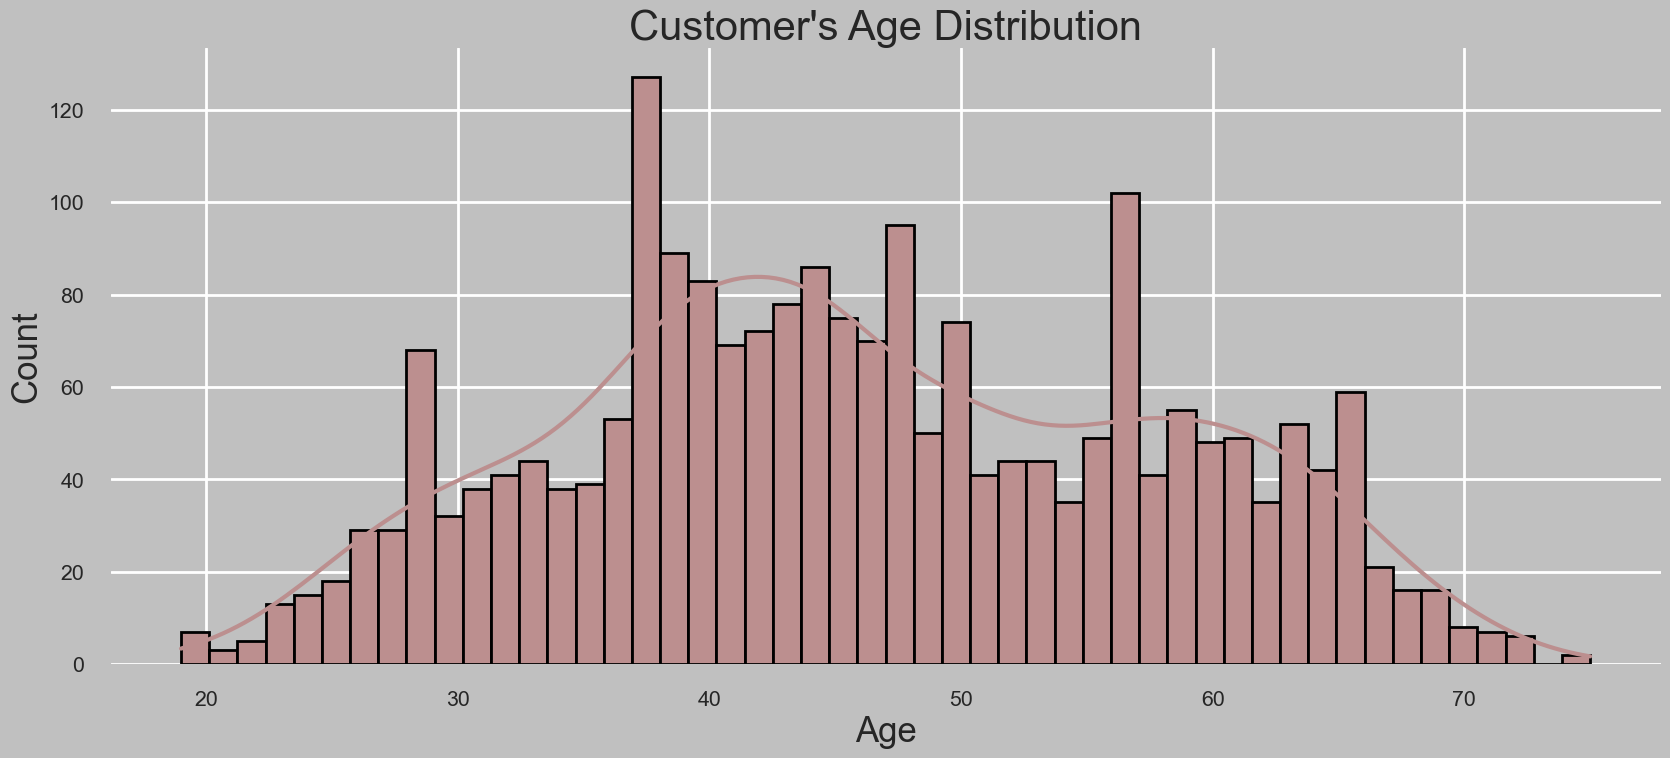

In [17]:
print(f"Let's have a look on the distribution of customer's age :")
plt.subplots(figsize=(20, 8))
p = sns.histplot(data["Age"],color="#BC8F8F",kde=True,bins=50,alpha=1,fill=True,edgecolor="black")
p.axes.lines[0]
p.axes.set_title("Customer's Age Distribution",fontsize=30)
plt.ylabel("Count",fontsize=25)
plt.xlabel("Age",fontsize=25)
sns.despine(left=True, bottom=True)

plt.show()

###                                              **Insights:**

*   We can see it's a normal distribution of customer's age.
*   Most of the customers are from 36 to 50.





Let's have a look on the distribution of customer's income and spending :


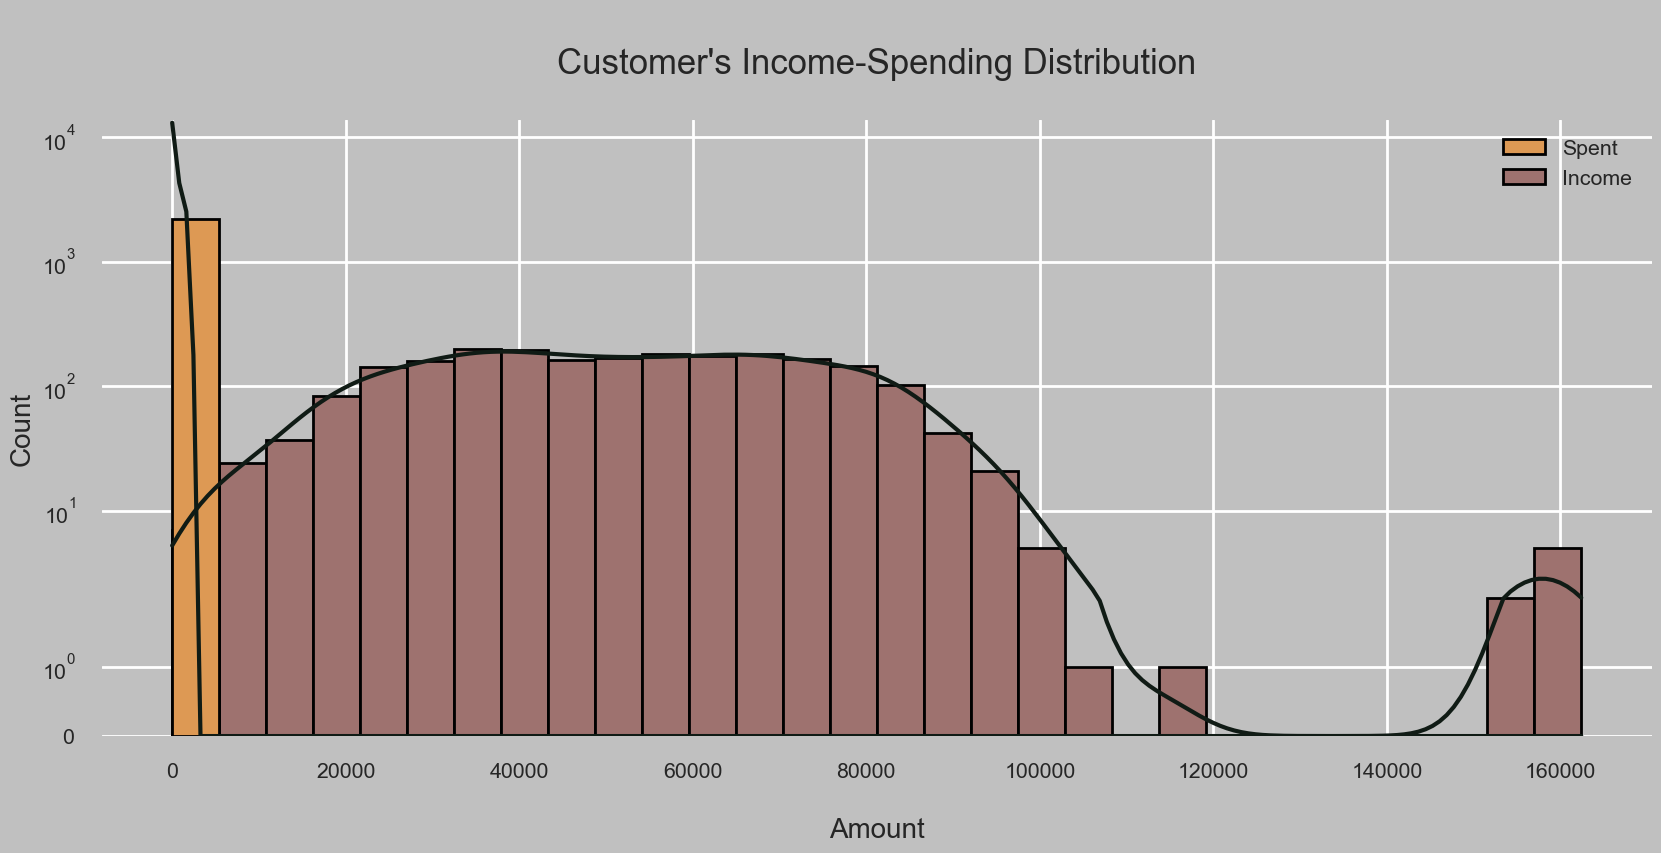

In [18]:
print(f"Let's have a look on the distribution of customer's income and spending :")
plt.subplots(figsize=(20, 8))
p = sns.histplot(data[["Spent","Income"]],palette=["#DD9954","#9E726F"],kde=True,bins=30,alpha=1,fill=True,edgecolor="black")
p.axes.lines[0].set_color(palette[0])
p.axes.lines[1].set_color(palette[0])
p.axes.set_yscale("symlog")
p.axes.set_title("\nCustomer's Income-Spending Distribution\n",fontsize=25)
plt.ylabel("Count",fontsize=20)
plt.xlabel("\nAmount",fontsize=20)
sns.despine(left=True, bottom=True)

plt.show()

###                                                **Insights:**


*   Most of the customers income range is in between 20000 to 80000
*   But almost all customers spend very few portion of their income.




In [19]:
data["Education"].value_counts()

Graduate         1115
Postgraduate      845
Undergraduate     252
Name: Education, dtype: int64

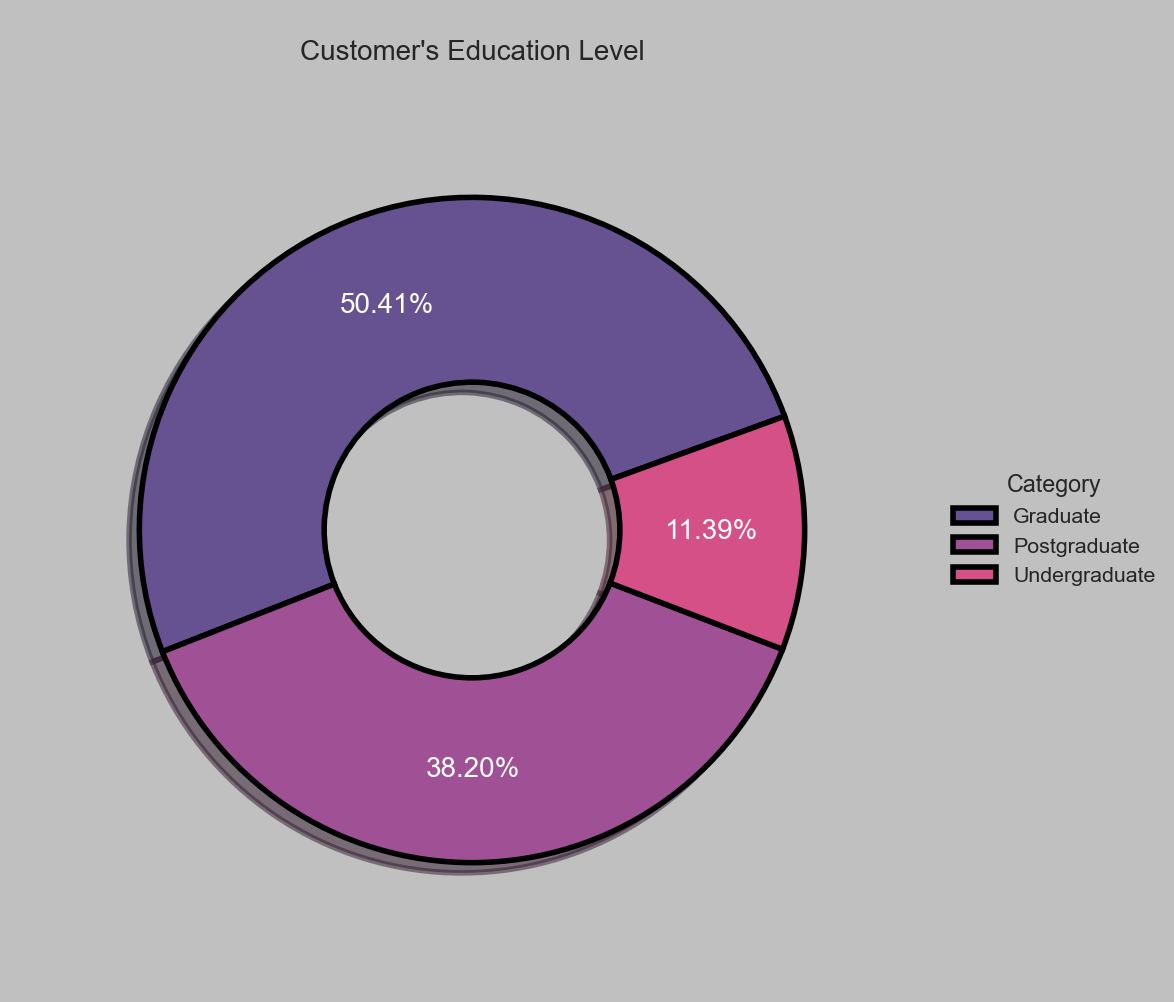

In [20]:
### print(f"Let's have a look on the customer's education :")
plt.subplots(figsize=(12, 12))

labels = "Graduate","Postgraduate","Undergraduate"
size = 0.5

wedges, texts, autotexts = plt.pie([data["Education"].value_counts()[0],
                                    data["Education"].value_counts()[1],
                                    data["Education"].value_counts()[2]],
                                    explode = (0,0,0),
                                    textprops=dict(size= 20, color= "white"),
                                    autopct="%.2f%%",
                                    pctdistance = 0.72,
                                    radius=.9,
                                    colors =colors6,
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "black",
                                    linewidth = 4),
                                    startangle = 20)

plt.legend(wedges, labels, title="Category",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nCustomer's Education Level",fontsize=20)
plt.show()

###                                              **Insights:**


*   Customers have three education levels : Undergraduate, Graduate, Postgraduate
*   11.39% customers are in undergraduate level, 50.41% have completed graduation and 38.2% are on postgraduation level.



Let's have a look on the distribution of customer's income and spending on basis of education level :


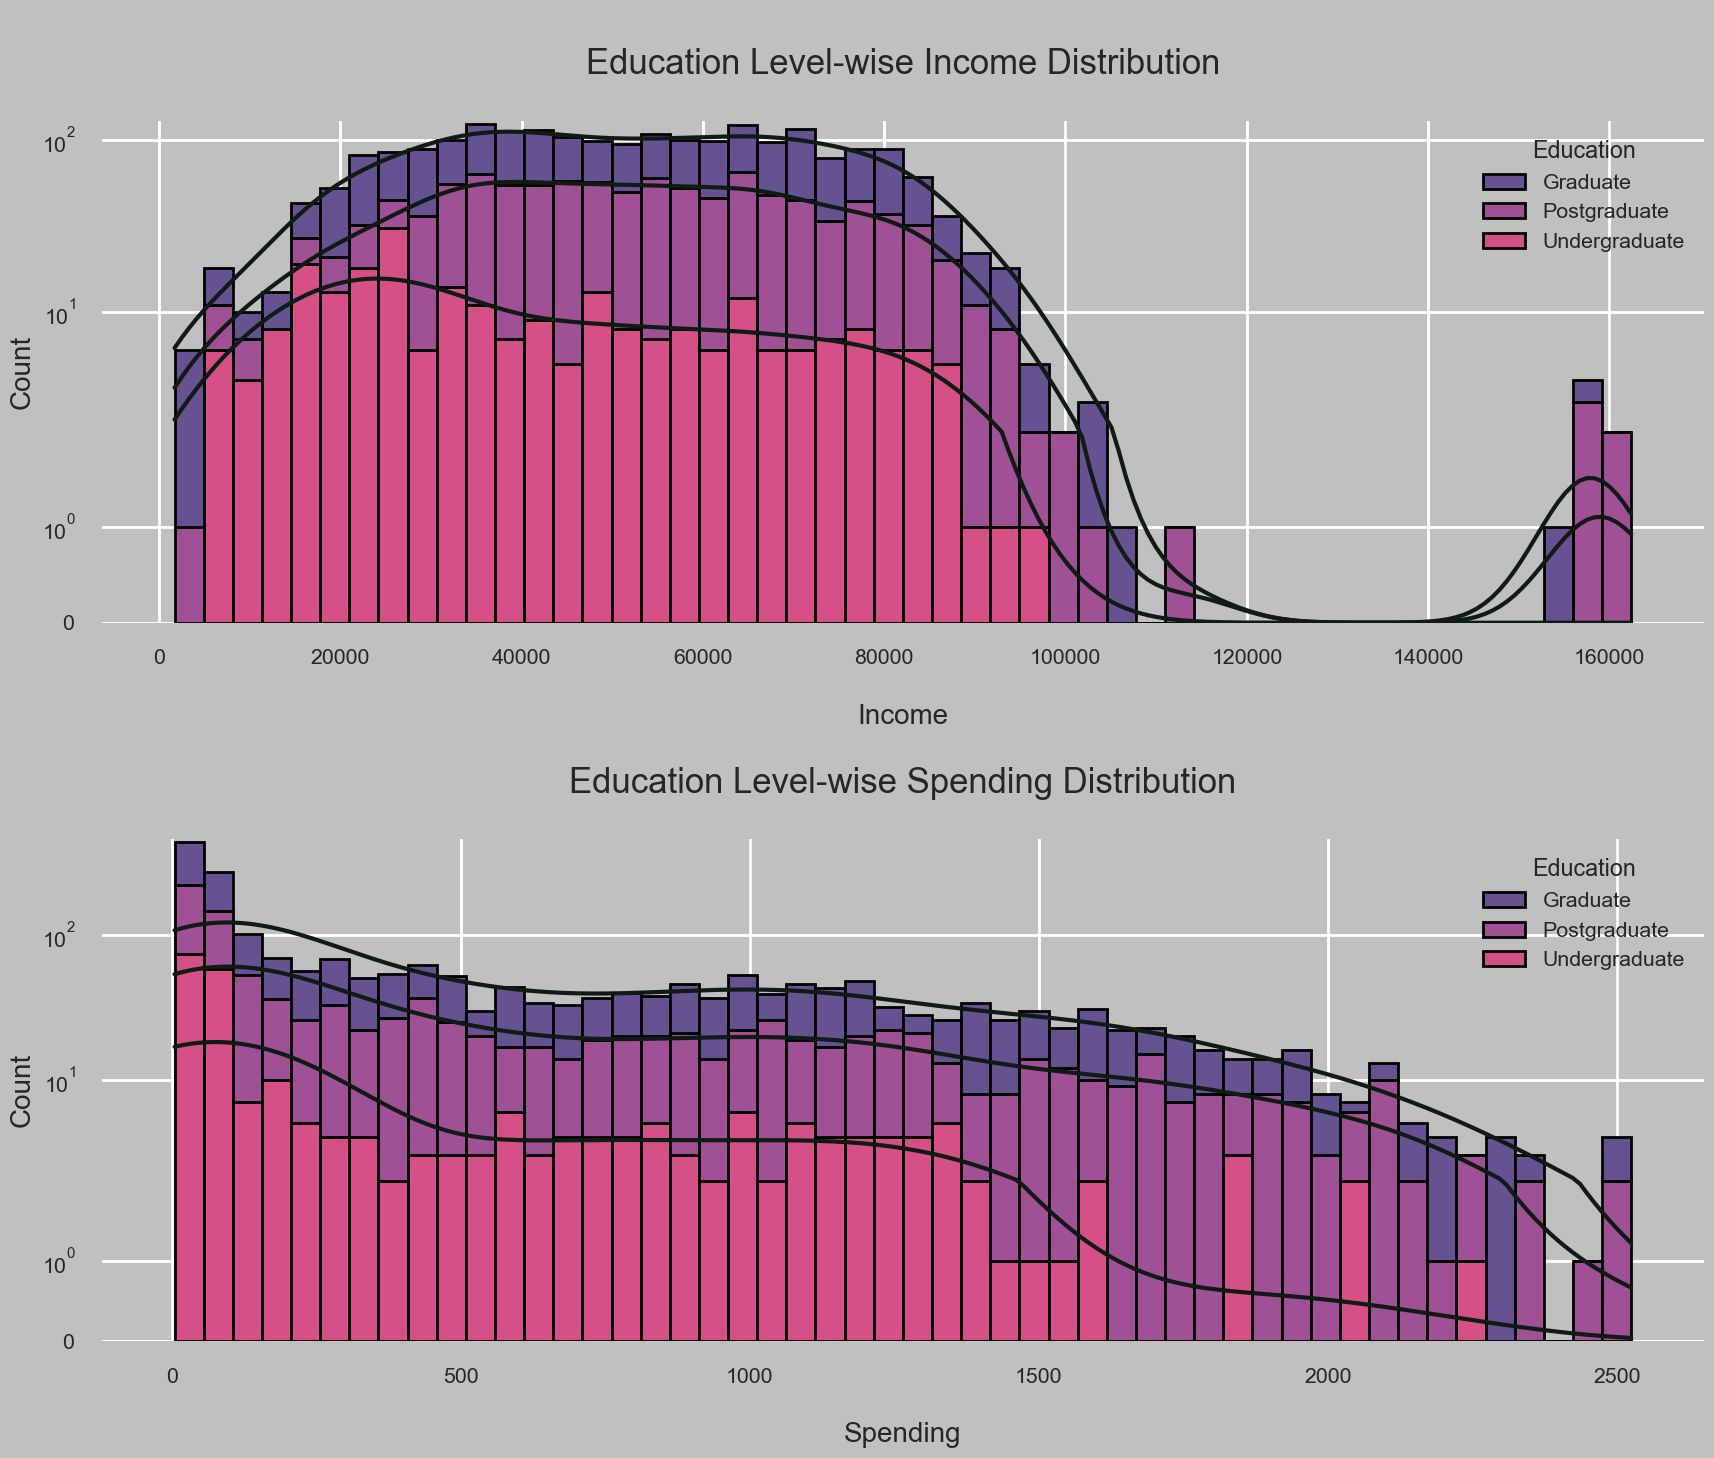

In [21]:
print(f"Let's have a look on the distribution of customer's income and spending on basis of education level :")

_, axes = plt.subplots(2,1,figsize=(20,16),sharex=False)
plt.tight_layout(pad=7.0)

sns.histplot(data=data,x="Income",hue="Education",multiple="stack",palette=colors6,ax=axes[0],kde=True,bins=50,alpha=1,fill=True,edgecolor="black")
axes[0].lines[0].set_color(palette[0])
axes[0].lines[1].set_color(palette[0])
axes[0].lines[2].set_color(palette[0])
axes[0].set_yscale("symlog")
axes[0].set_title("\nEducation Level-wise Income Distribution\n",fontsize=25)
axes[0].set_ylabel("Count",fontsize=20)
axes[0].set_xlabel("\nIncome",fontsize=20)

sns.histplot(data=data,x="Spent",hue="Education",multiple="stack",palette=colors6,ax=axes[1],kde=True,bins=50,alpha=1,fill=True,edgecolor="black")
axes[1].lines[0].set_color(palette[0])
axes[1].lines[1].set_color(palette[0])
axes[1].lines[2].set_color(palette[0])
axes[1].set_yscale("symlog")
axes[1].set_title("\nEducation Level-wise Spending Distribution\n",fontsize=25)
axes[1].set_ylabel("Count",fontsize=20)
axes[1].set_xlabel("\nSpending",fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

###                                             **Insights:**
*  Most of the undergraduate level customer's income range is in between 10000 to 80000 and spending in between 0 to 1400.
*  Most of the graduate level customer's income range is in between 20000 to 85000 and spending in between 0 to 2000.
*  Most of the postgraduate level customer's income range is in between 30000 to 80000 and spending in between 0 to 2000.






Let's have a look on the distribution of customer's income and spending on basis of marital and parental status :


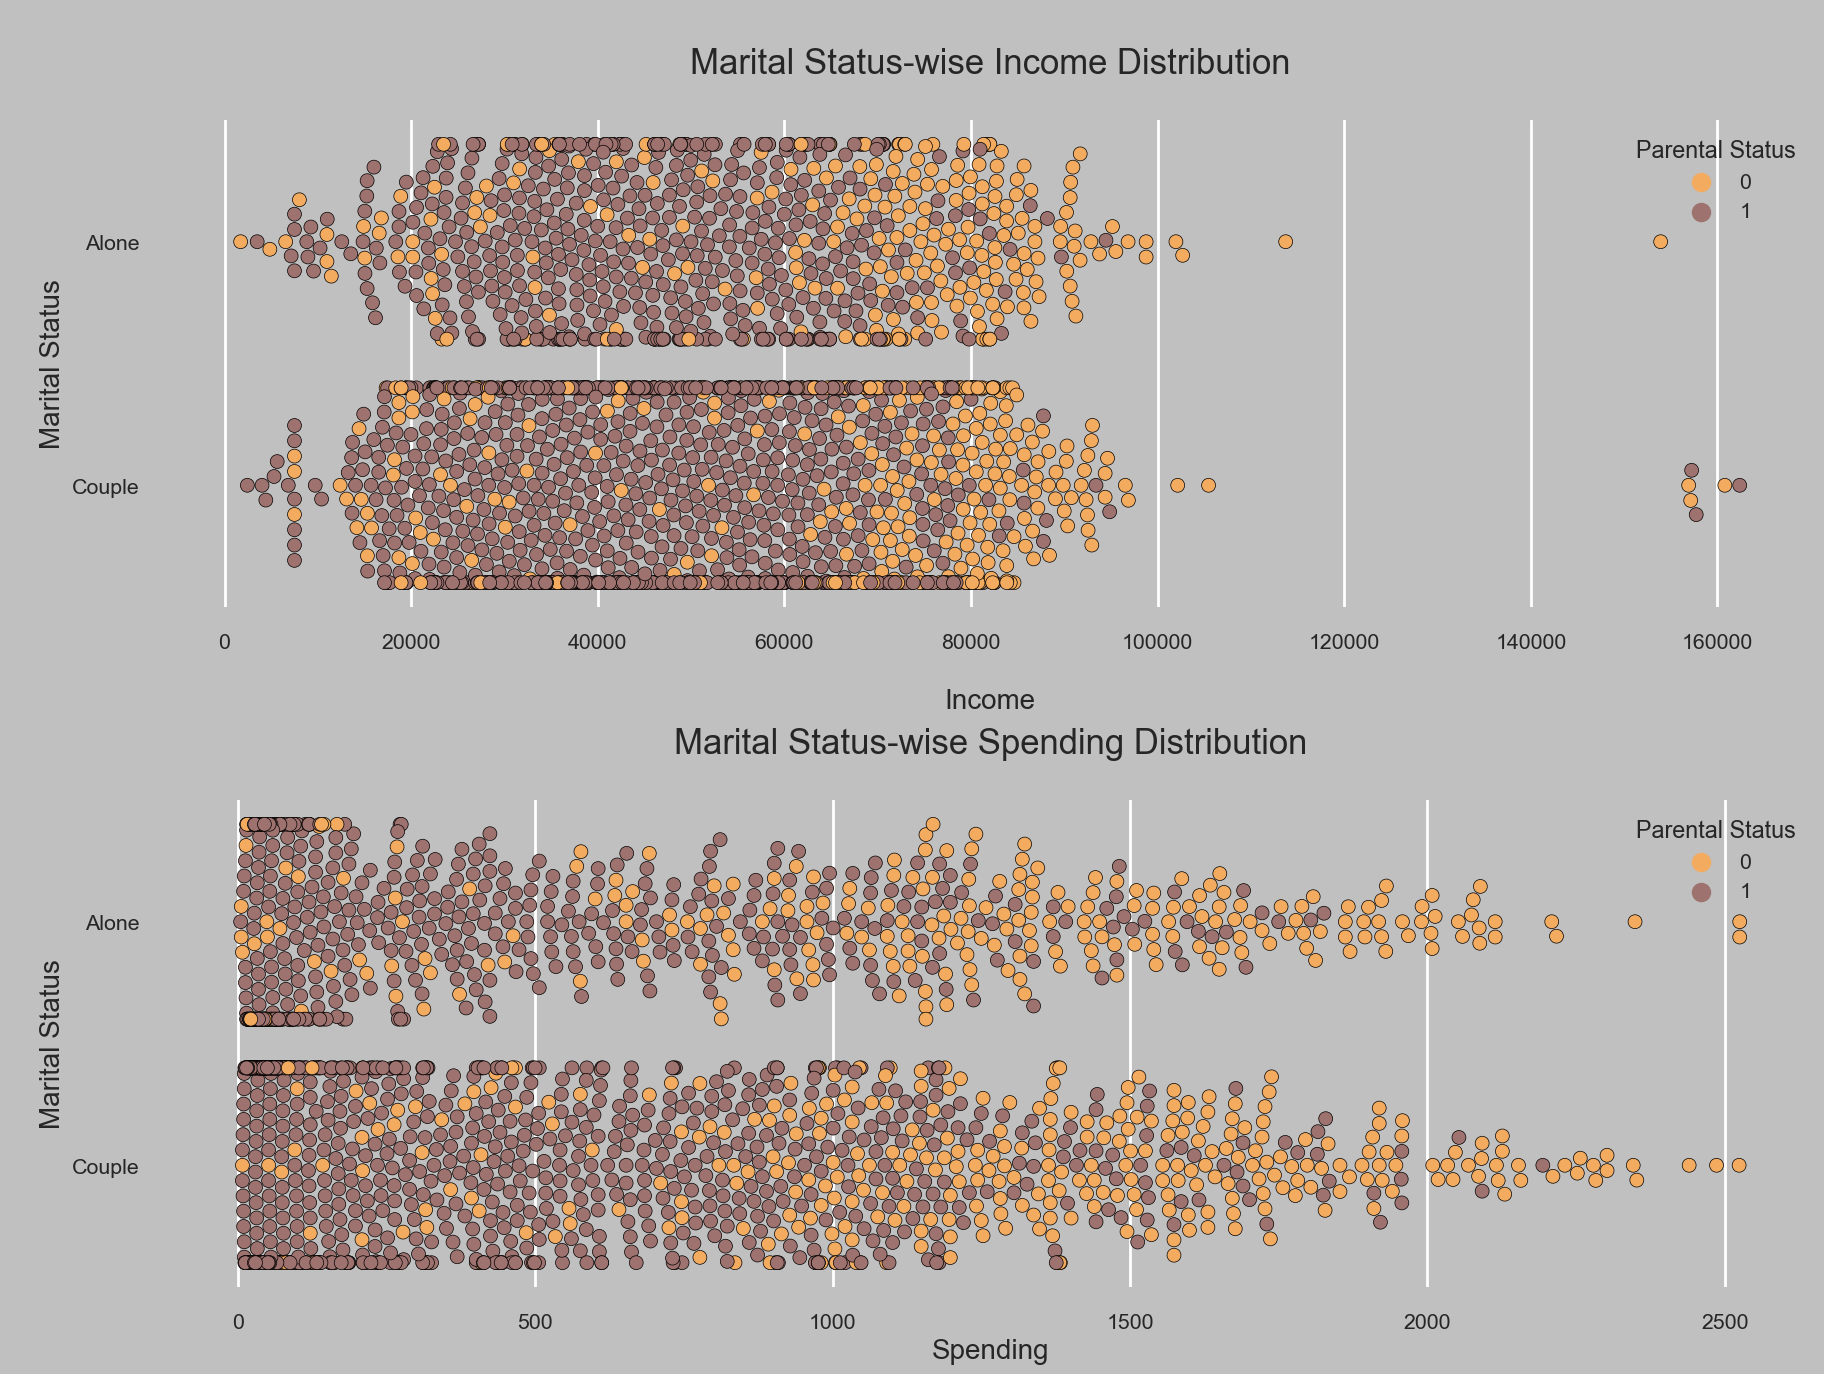

In [22]:
print(f"Let's have a look on the distribution of customer's income and spending on basis of marital and parental status :")

_, axes = plt.subplots(2,1,figsize=(20,15),sharex=False)
plt.tight_layout(pad=6.0)

sns.swarmplot(x=data["Income"],y=data["Marital Status"],hue=data["Parental Status"],palette=["#F3AB60","#9E726F"],ax=axes[0],marker="o",size=10,alpha=1,linewidth=0.5,edgecolor="black")
axes[0].set_title("\nMarital Status-wise Income Distribution\n",fontsize=25)
axes[0].set_xlabel("\nIncome",fontsize=20)
axes[0].set_ylabel("\nMarital Status",fontsize=20)

sns.swarmplot(x=data["Spent"],y=data["Marital Status"],hue=data["Parental Status"],palette=["#F3AB60","#9E726F"],ax=axes[1],marker="o",size=10,alpha=1,linewidth=0.5,edgecolor="black")
axes[1].set_title("\nMarital Status-wise Spending Distribution\n",fontsize=25)
axes[1].set_xlabel("Spending",fontsize=20)
axes[1].set_ylabel("\nMarital Status",fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

###                                        **Insights:**

*   Most of the customers live together.
*   Customers who live together and are parents earn much and spend much.



Let's have a look on the distribution of customer's children :


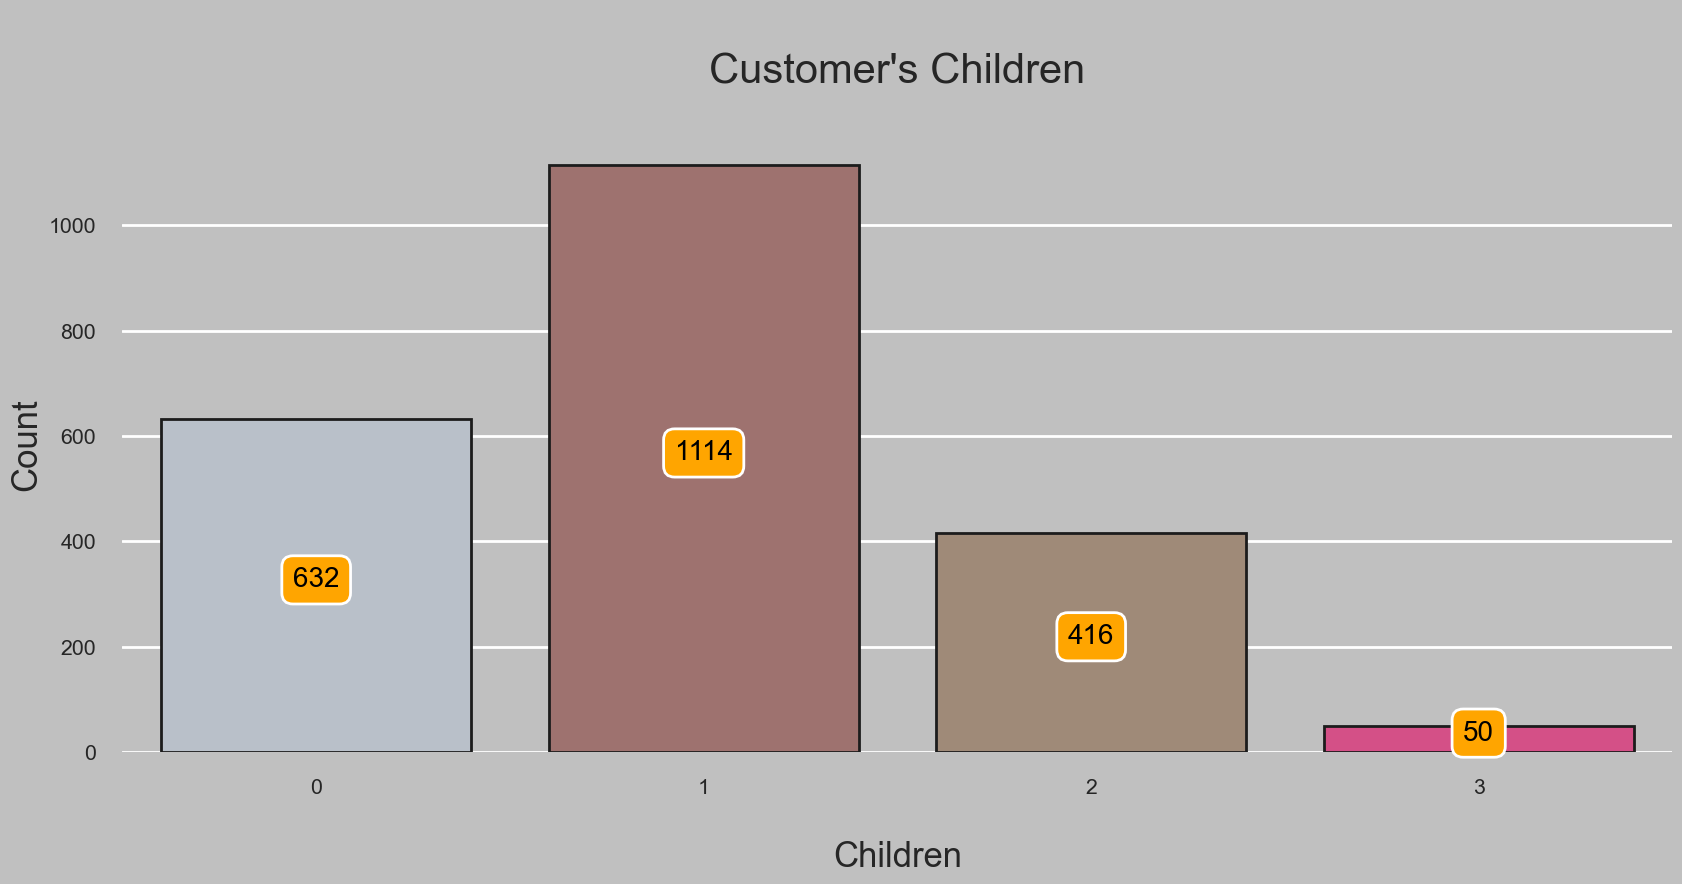

In [23]:
print(f"Let's have a look on the distribution of customer's children :")
plt.subplots(figsize=(20, 8))
p = sns.countplot(x=data["Children"],palette=["#B9C0C9","#9E726F", "#9F8A78","#d45087"], saturation=1,edgecolor = "#1c1c1c", linewidth = 2)
p.axes.set_yscale("linear")
p.axes.set_title("\nCustomer's Children\n",fontsize=30)
p.axes.set_ylabel("Count",fontsize=25)
p.axes.set_xlabel("\nChildren",fontsize=25)
p.axes.set_xticklabels(p.get_xticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=4,size=20,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "white", "linewidth" : 2, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

###                                              **Insights:**


*  632 customers have no child.
*  Most of the customers have one child.
*  416 customers have two child.
*  50 customers have three child.


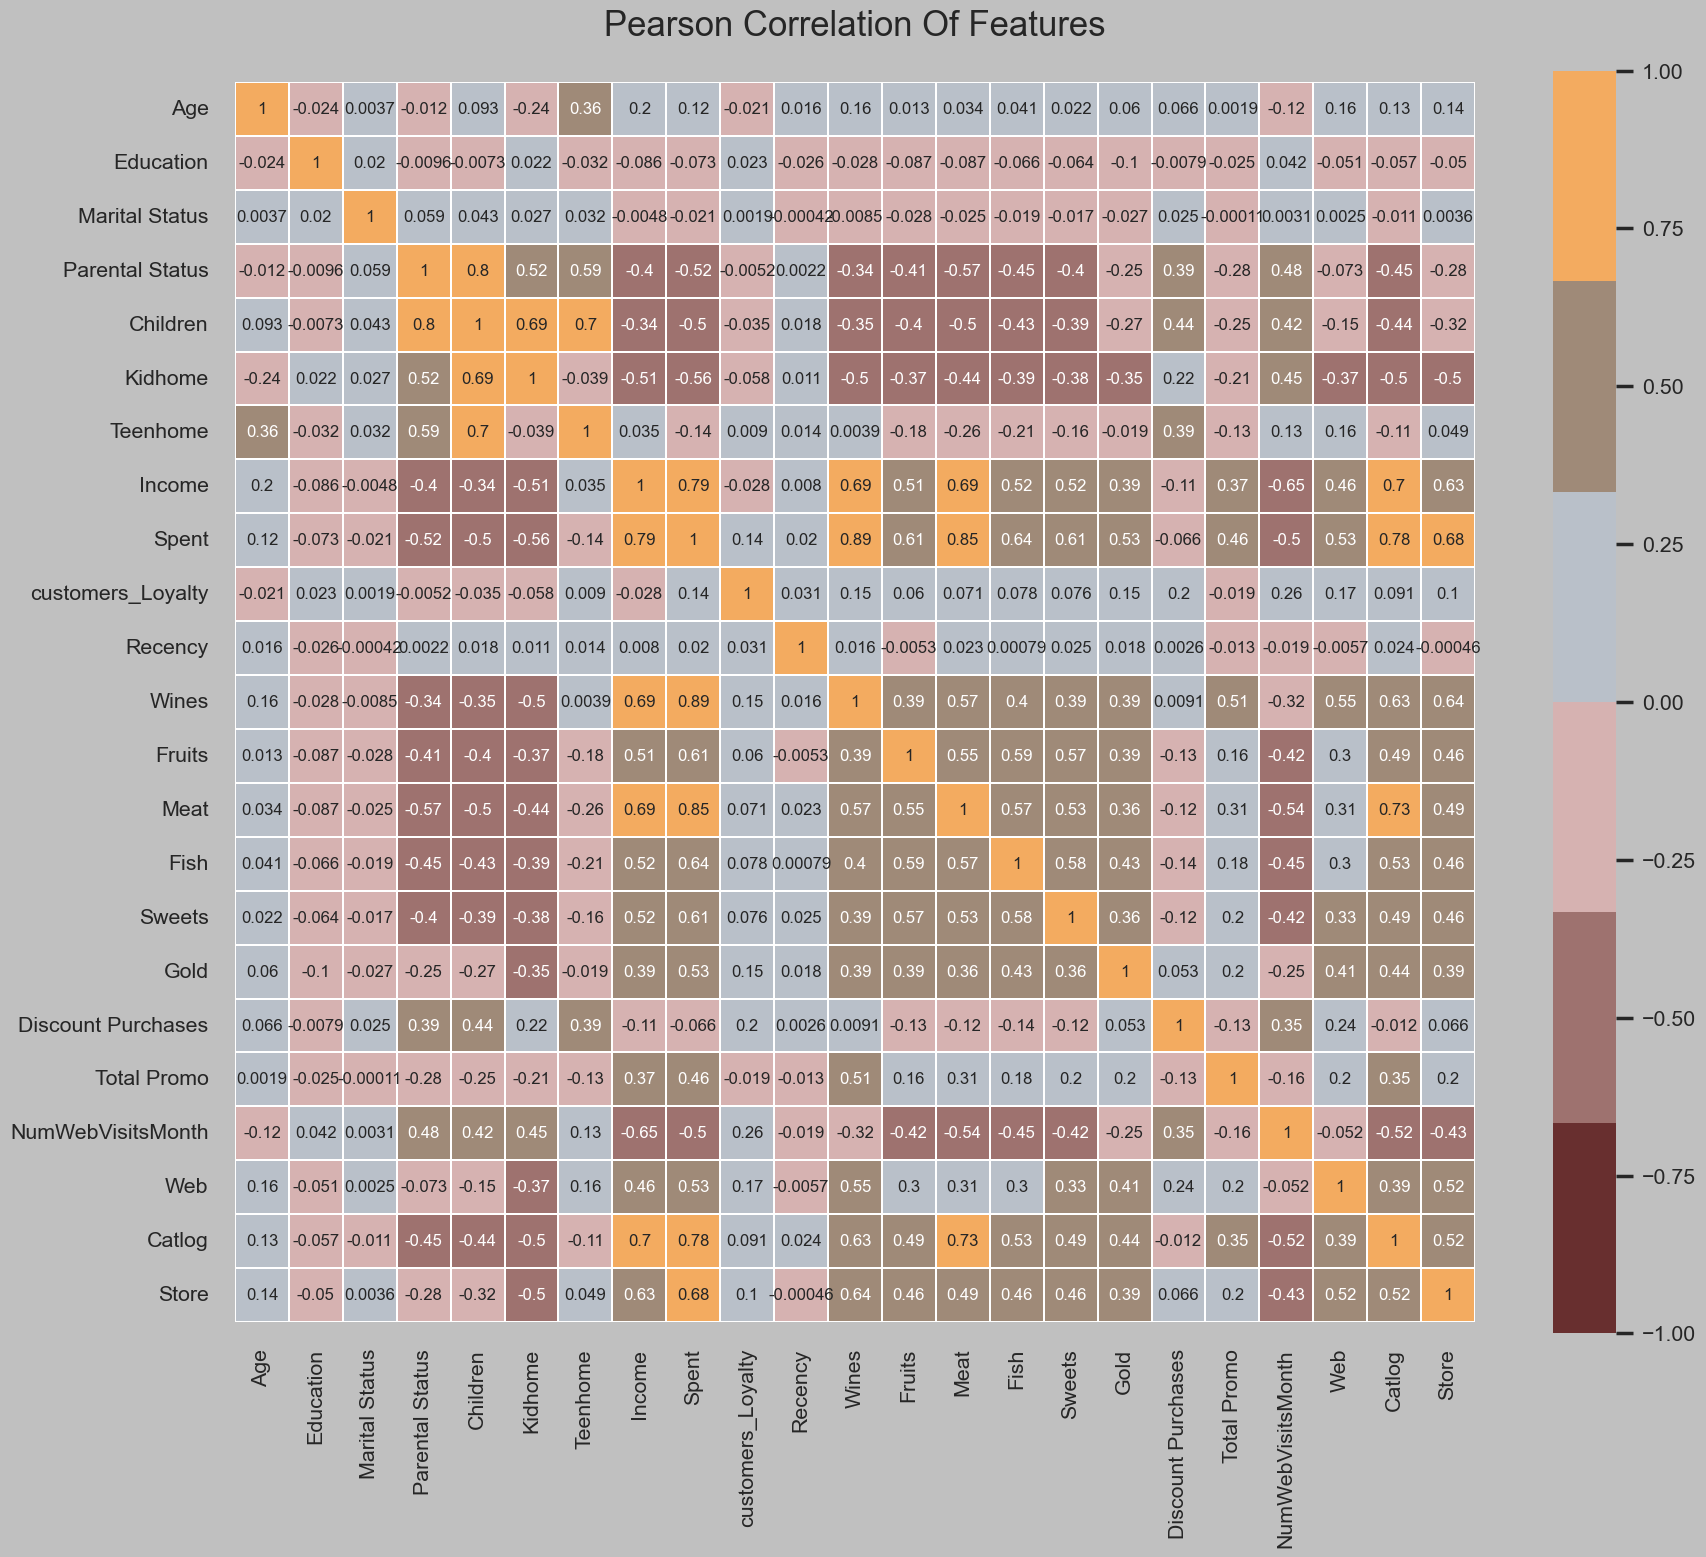

In [24]:
catcol = ["Education","Marital Status"]
le = LabelEncoder()
for col in catcol:
        data[col] = le.fit_transform(data[col])


plt.subplots(figsize =(20, 20))

sns.heatmap(data.drop(columns="ID").corr(), cmap = palette_cmap, square=True, cbar_kws=dict(shrink =.82),
            annot=True, vmin=-1, vmax=1, linewidths=0.1,linecolor='white',annot_kws=dict(fontsize =12))
plt.title("Pearson Correlation Of Features\n", fontsize=25)
plt.xticks(rotation=90)
plt.show()

In [25]:
data["Education"].value_counts()

0    1115
1     845
2     252
Name: Education, dtype: int64

###                                           **Insights:**

*   High correlation between customer's income and spending. Also high correlation between buying wine, meat and buying through catalog and stores with income and spending.
*   High correlation between buying meat and buying through catalog.




In [26]:
dataC = data.copy()
scaler = StandardScaler()
dataC = scaler.fit_transform(dataC)
scaled_data = pd.DataFrame(dataC, columns= data.columns)
print("After scaling, let's have a glimpse of the scaled dataset :")
scaled_data.sample(5)

After scaling, let's have a glimpse of the scaled dataset :


ID       Age  Education  Marital Status  Parental Status  \
1591 -1.174132 -0.776680   2.036900        0.740959        -1.581139   
1484 -0.616351  1.189307   0.571657       -1.349603        -1.581139   
1871 -0.793141 -1.716935   0.571657        0.740959        -1.581139   
550   1.088718  0.590963  -0.893586       -1.349603         0.632456   
637  -0.264927  1.616696   0.571657        0.740959         0.632456   

      Children   Kidhome  Teenhome    Income     Spent  ...      Meat  \
1591 -1.264598 -0.822754 -0.929699 -1.838354 -0.913494  ... -0.678088   
1484 -1.264598 -0.822754 -0.929699 -0.106485  1.309366  ... -0.209764   
1871 -1.264598 -0.822754 -0.929699  1.694103  2.426606  ...  1.984668   
550   0.069987 -0.822754  0.908097  0.678650  0.759876  ... -0.026894   
637   0.069987 -0.822754  0.908097 -0.062391 -0.896893  ... -0.633485   

          Fish    Sweets      Gold  Discount Purchases  Total Promo  \
1591 -0.486649 -0.487968 -0.598234           -0.688432    -0.439160   
1484 -0.377079 -0.341918 -0.095286           -0.168701     1.032691   
1871  1.120374  1.654105  2.109943           -0.688432     3.976394   
550   0.499478  0.315309 -0.037254            0.870761    -0.439160   
637  -0.687527 -0.634019 -0.675610           -0.688432    -0.439160   

      NumWebVisitsMonth       Web    Catlog     Store  
1591           1.516906 -0.761665 -0.913000 -0.863487  
1484           1.104543  0.332600  2.503607 -0.248141  
1871          -1.781997 -0.032155  1.478625  0.674878  
550            1.104543 -0.032155 -0.229679  0.982551  
637           -1.369634 -1.126420 -0.571340 -0.555814  

[5 rows x 24 columns]

In [27]:
scaled_dataC = scaled_data.copy()
pca = PCA(n_components = 3,random_state = 42)
scaled_dataC = pca.fit_transform(scaled_dataC)
pca_data = pd.DataFrame(scaled_dataC, columns=["col1","col2", "col3"])

print("Let's have a glimpse of the PCA transformed dataset :")
pca_data.sample(15)

Let's have a glimpse of the PCA transformed dataset :


col1      col2      col3
838  -0.765385  1.059628 -0.187900
1626 -0.832503  0.664911 -0.711078
1197  4.806468 -0.905055 -0.241485
1782 -2.112345  1.157938 -1.262787
213  -2.281761 -0.191508  1.430227
1141  3.645123 -1.526792  1.787900
1756 -2.432462 -0.453594  2.272927
405  -2.673473 -1.781224 -0.176282
392  -3.002048 -1.251016  0.937295
34    1.211856  1.890285 -1.187774
580  -2.643803 -1.150372  0.992131
1577 -1.580964 -0.182641  1.754415
1300 -0.045904  1.240833 -0.112590
128  -3.169963  0.362622 -0.444803
2067  5.539889 -1.373313  1.677419

In [28]:
x = pca_data["col1"]
y = pca_data["col2"]
z = pca_data["col3"]

print(f"Let's have a look on the dataset after dimensionality reduction :")


fig = go.Figure(data = [go.Scatter3d(x=x, y=y, z=z,mode='markers',
                marker = dict(size=10, color="#9F8A78", opacity=0.8))])
fig.update_layout(title=dict(text= "Dataset After Diemsionality Reduction[3D Projection]",
                             y=0.97,x=0.5,xanchor= "center",yanchor= "top",font_color="black"),
                  scene=dict(xaxis = dict(title="col1",backgroundcolor="#C0C0C0",showbackground=True,showgrid=True, gridwidth=2, gridcolor='white',zerolinecolor="white"),
                             yaxis = dict(title="col2",backgroundcolor="#C0C0C0",showbackground=True,showgrid=True, gridwidth=2, gridcolor='white',zerolinecolor="white"),
                             zaxis = dict(title="col3",backgroundcolor="#C0C0C0",showbackground=True,showgrid=True, gridwidth=2, gridcolor='white',zerolinecolor="white")),
                  margin=dict(l=0, r=0, b=0, t=0),paper_bgcolor="#C0C0C0")
                 
fig.show()

Let's have a look on the dataset after dimensionality reduction :


In [29]:
print("Elbow Method for determining the number of clusters :")
_, axes = plt.subplots(figsize=(20,8))

elbow = KElbowVisualizer(KMeans(), k=10, timings=False, locate_elbow=True, size=(1260,450))
elbow.fit(pca_data)

axes.set_title("\nDistortion Score Elbow For KMeans Clustering\n",fontsize=20)
axes.set_xlabel("\nK",fontsize=15)
axes.set_ylabel("\nDistortion Score",fontsize=15)

sns.despine(left=True, bottom=True)
plt.show()

Elbow Method for determining the number of clusters :


###                                          **Insights:**

*  We will use k = 4, thus there will be four clusters in our dataset.
*  We will use KMeans Algorithm for clustering.


In [30]:
km = KMeans(n_clusters = 4,random_state = 42)
# ac = AgglomerativeClustering(n_clusters=4)

y_km = km.fit_predict(pca_data)
pca_data["Clusters"] = y_km
data["Clusters"]= y_km

Let's have a look on the customers quantity distribution after clustering :


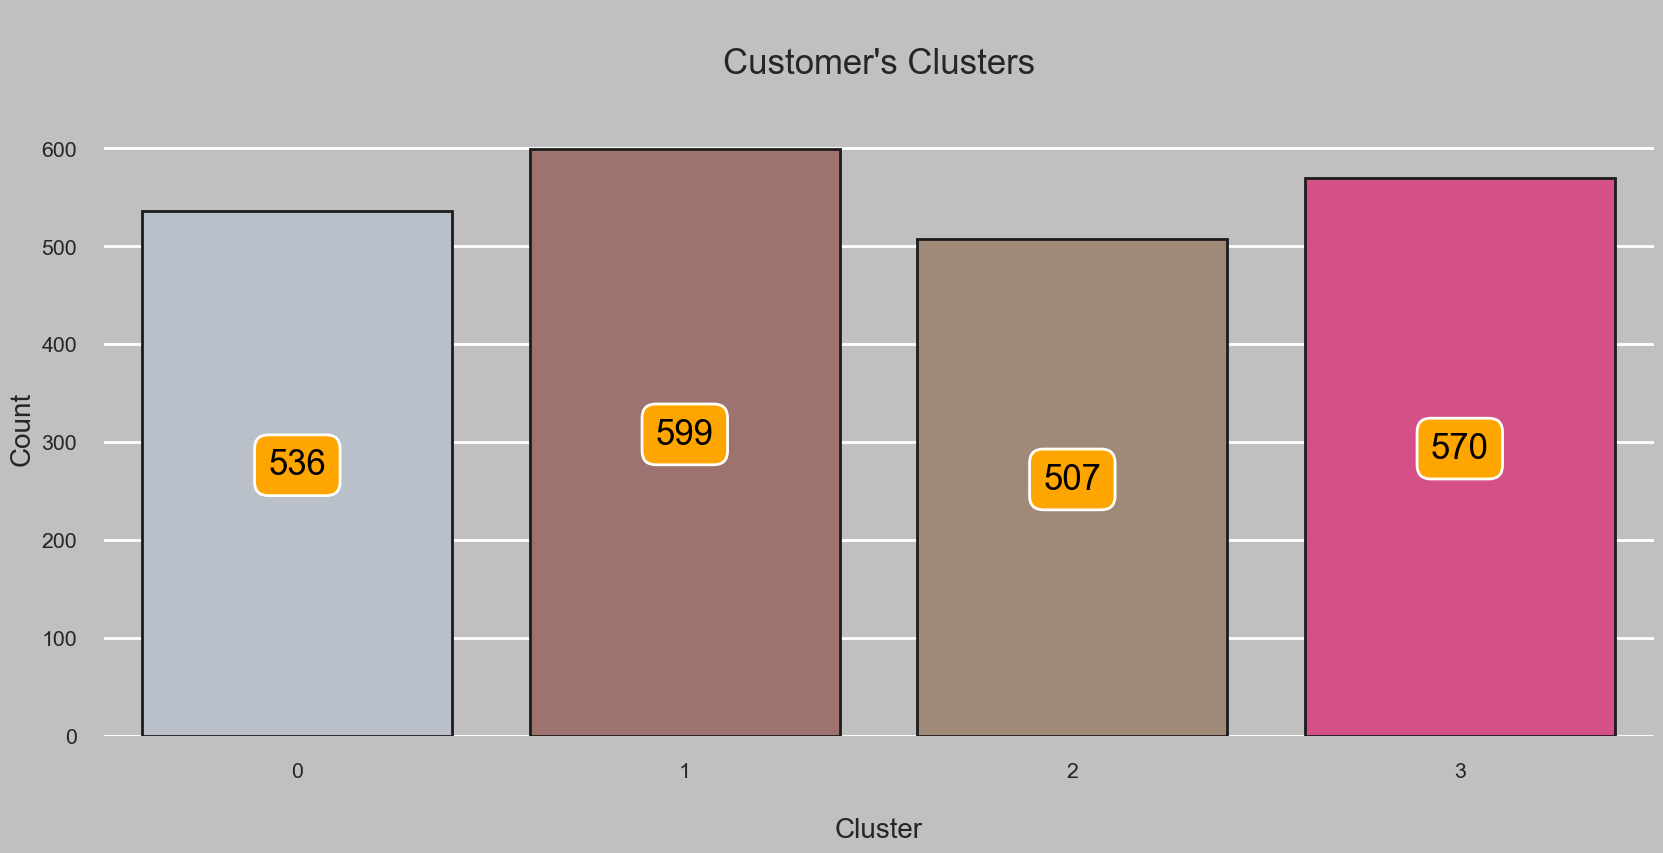

In [31]:
print("Let's have a look on the customers quantity distribution after clustering :")

plt.subplots(figsize=(20, 8))
p = sns.countplot(x=data["Clusters"],palette=["#B9C0C9","#9E726F", "#9F8A78","#d45087"], saturation=1,edgecolor = "#1c1c1c", linewidth = 2)
p.axes.set_yscale("linear")
p.axes.set_title("\nCustomer's Clusters\n",fontsize=25)
p.axes.set_ylabel("Count",fontsize=20)
p.axes.set_xlabel("\nCluster",fontsize=20)
p.axes.set_xticklabels(p.get_xticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=25,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "white", "linewidth" : 2, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

###                                                 **Insights:**


*   Cluster 0 has 507 customers.
*   Cluster 1 has the highest amount of 599 customers.
*  Cluster 2 has 536 customers.
*  Cluster 3 has 570 customers.


In [32]:
print(f"Let's have a look on the dataset after clustering :")

fig = go.Figure(data = [go.Scatter3d(x=x, y=y, z=z,mode='markers',
                marker = dict(size=10, color=pca_data["Clusters"],colorscale=["#B9C0C9","#BC8F8F", "#9F8A78","#F3AB60"], opacity=1))])
fig.update_layout(title=dict(text= "Dataset After Clustering[3D Projection]",
                             y=0.97,x=0.5,xanchor= "center",yanchor= "top",font_color="black"),
                  scene=dict(xaxis = dict(title="col1",backgroundcolor="#D4C8BA",showbackground=True,showgrid=True, gridwidth=2, gridcolor='white',zerolinecolor="white"),
                             yaxis = dict(title="col2",backgroundcolor="#D4C8BA",showbackground=True,showgrid=True, gridwidth=2, gridcolor='white',zerolinecolor="white"),
                             zaxis = dict(title="col3",backgroundcolor="#D4C8BA",showbackground=True,showgrid=True, gridwidth=2, gridcolor='white',zerolinecolor="white")),
                  margin=dict(l=0, r=0, b=0, t=0),paper_bgcolor="#D4C8BA")
fig.show()

Let's have a look on the dataset after clustering :


In [33]:
print(f"Let's have a look on the characteristics of the clusters on the basis of income and spending :")

_, axes = plt.subplots(figsize=(20,8))
sns.scatterplot(x=data["Spent"],y=data["Income"],hue=data["Clusters"],palette=["#B9C0C9","#BC8F8F", "#9F8A78","#F3AB60"],sizes=60, alpha=1,edgecolor = "#1c1c1c", linewidth = 1)
axes.set_title("\nIncome-Spending Basis Clustering Profile\n",fontsize=25)
axes.set_ylabel("Income",fontsize=20)
axes.set_xlabel("\nSpending",fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

Let's have a look on the characteristics of the clusters on the basis of income and spending :


###                                          **Insights:**

*   Most of the cluster 0 customers income range is in between 65000 to 85000 and spending range is in between 550 to 2000.

*   Most of the cluster 1 customers income range is in between 5000 to 40000 and spending range is in between 0 to 500.
* Most of the cluster 2 customers income range is in between 50000 to 80000 and spending range is in between 250 to 1800.


*   Most of the cluster 3 customers income range is in between 40000 to 60000 and spending range is in between 0 to 500




Let's have a look on the characteristics of the clusters on the basis of spending :


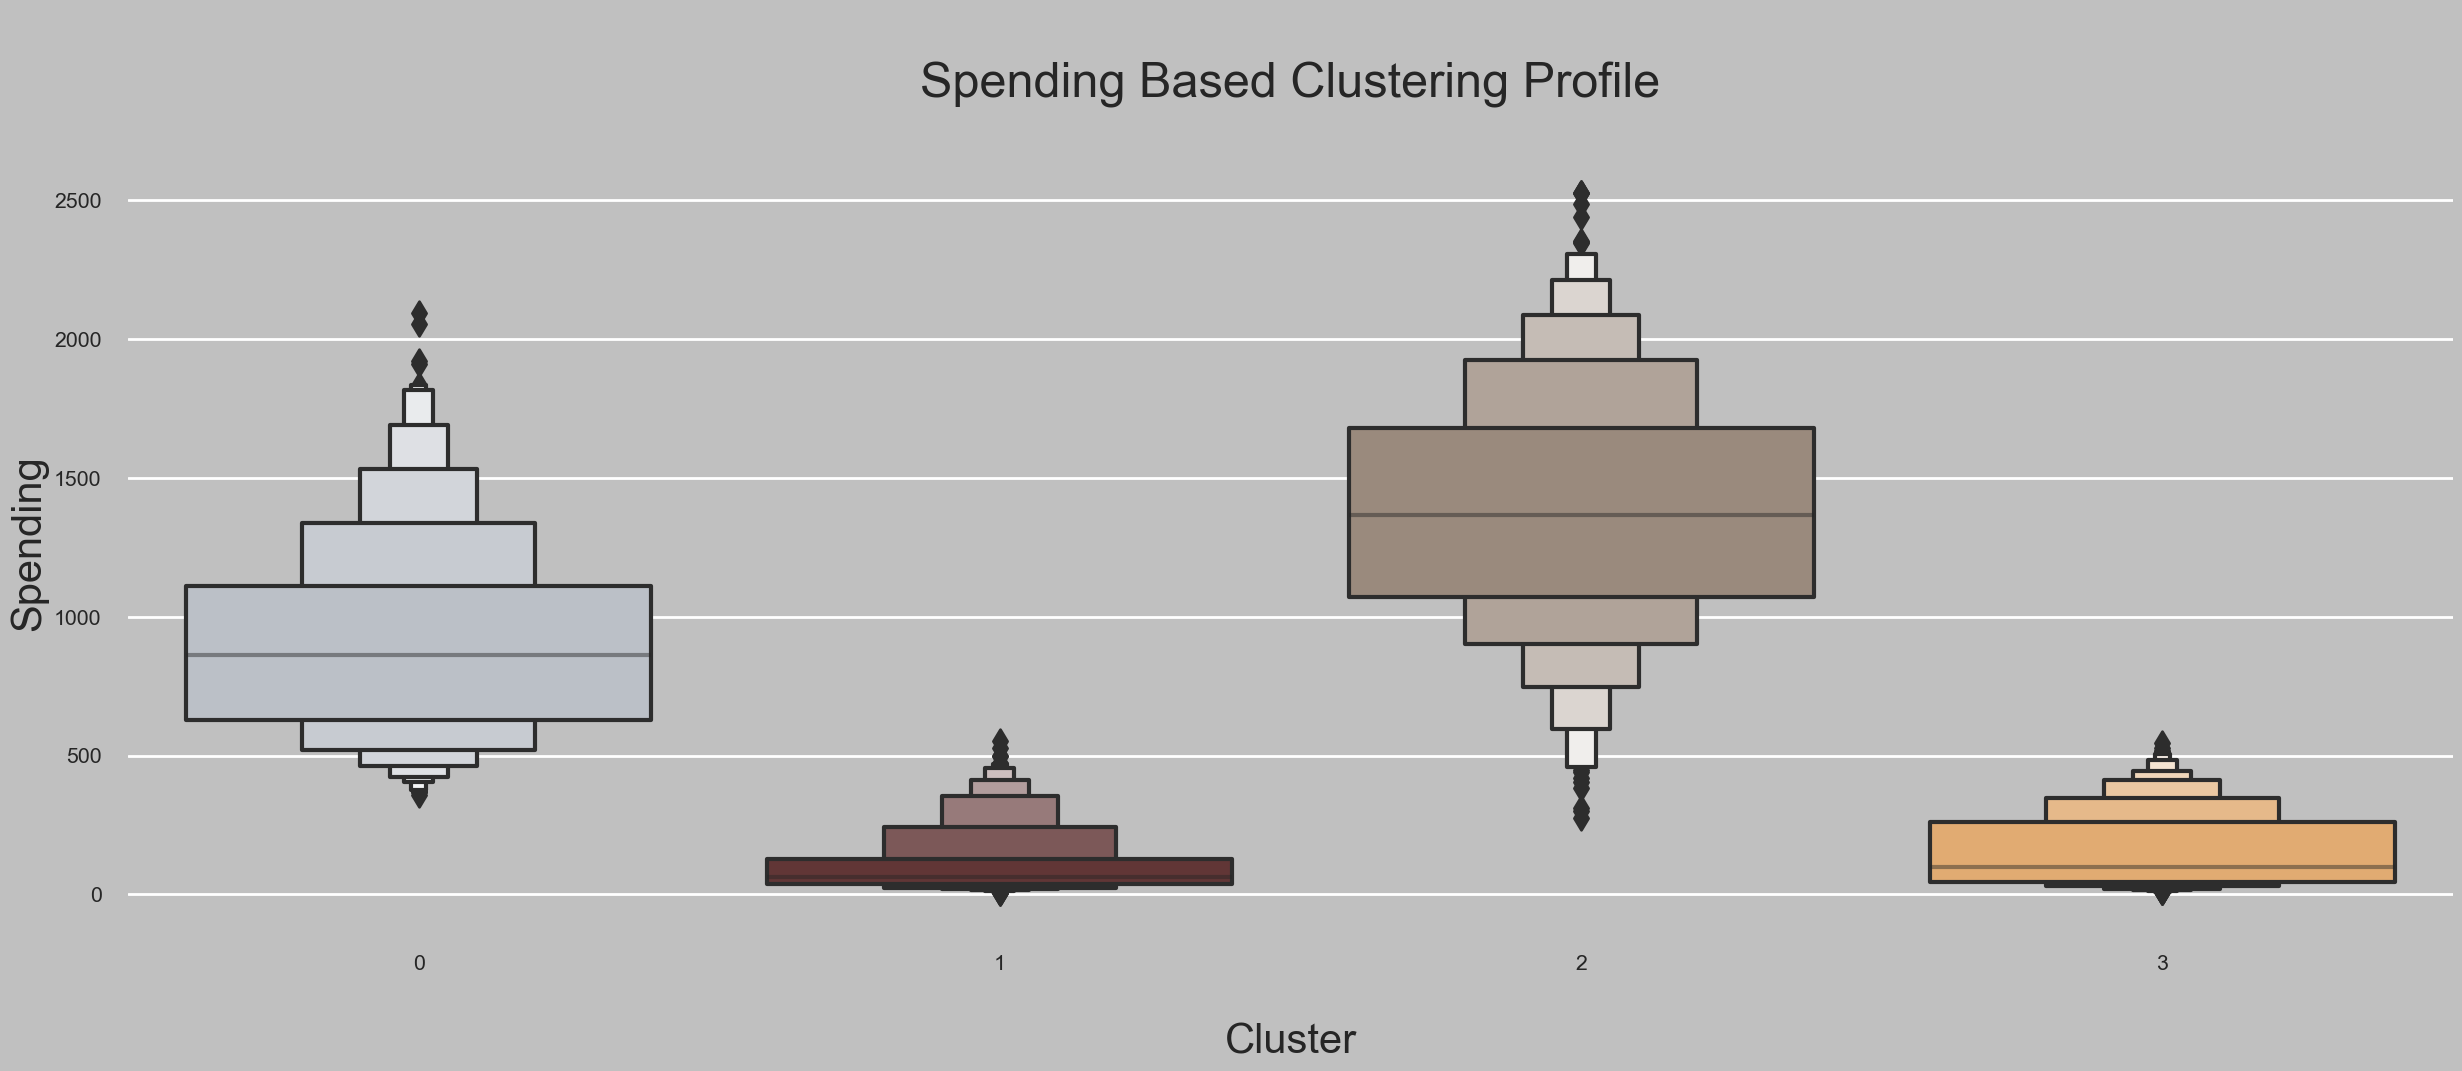

In [34]:
print(f"Let's have a look on the characteristics of the clusters on the basis of spending :")

_, axes = plt.subplots(figsize=(30,10))
sns.boxenplot(x=data["Clusters"], y=data["Spent"], palette=["#B9C0C9","#682F2F", "#9F8A78","#F3AB60"])

axes.set_title("\nSpending Based Clustering Profile\n",fontsize=35)
axes.set_ylabel("Spending",fontsize=30)
axes.set_xlabel("\nCluster",fontsize=30)

sns.despine(left=True, bottom=True)
plt.show()

###                                           **Insights:**


*   Most of the cluster 0 customers spending range is in between 550 to 2000.
*   Most of the cluster 1 customers spending range is in between 0 to 500.
*   Most of the cluster 2 customers spending range is in between 250 to 1800.
*   Most of the cluster 3 customers spending range is in between 0 to 500.


In [35]:
print(f"Let's have a look on the characteristics of the clusters on the basis of accepting promotions :")

plt.subplots(figsize=(20, 8))
p = sns.countplot(x=data["Total Promo"],hue=data["Clusters"],palette=["#B9C0C9","#BC8F8F", "#9F8A78","#F3AB60"], saturation=1,edgecolor = "#1c1c1c", linewidth = 1)
p.axes.set_yscale("linear")
p.axes.set_title("\nPromotions Acceptance Based Clustering Profile\n",fontsize=30)
p.axes.set_ylabel("Count",fontsize=25)
p.axes.set_xlabel("\nAccepted Promotions",fontsize=25)
p.axes.set_xticklabels(p.get_xticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=10,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "white", "linewidth" : 1, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

Let's have a look on the characteristics of the clusters on the basis of accepting promotions :


###                                               **Insights:**


*   281 customers of cluster 0, 546 customers of cluster 1, 408 customers of cluster 2 and 519 customers of cluster 3 have not accepted any promotions yet.

*   123 customers of cluster 0, 52 customers of cluster 1, 100 customers of cluster 2 and 47 customers of cluster 3 have accepted only one promotions yet.

*   55 customer of cluster 0, 1 customers of cluster 1, 21 customers of cluster 2 and 4 customers of cluster 3 have accepted two promotions.
*   Only 37 customers of cluster 0 and 7 customers of cluster 2 have accepted three promotions.
*   Only 11 customers of cluster 0 have accepted Four promotions.



In [36]:
print(f"Let's have a look on the characteristics of the clusters on the basis of discount purchases :")

_, axes = plt.subplots(figsize=(30,10))
sns.boxenplot(x=data["Clusters"], y=data["Discount Purchases"], palette=["#B9C0C9","#682F2F", "#9F8A78","#F3AB60"])

axes.set_title("\nDiscount Purchase Based Clustering Profile\n",fontsize=30)
axes.set_ylabel("Discount Purchase",fontsize=25)
axes.set_xlabel("\nCluster",fontsize=25)

sns.despine(left=True, bottom=True)
plt.show()

Let's have a look on the characteristics of the clusters on the basis of discount purchases :


###                                     **Insights:**
*   Most of the customers of cluster 0 have completed purchases using discount only one times.
*   Most of the customers of cluster 1 have completed purchases using discount 1 to 2 times.
*   Most of the customers of cluster 2 have completed purchases using discount 2 to 5 times.
*   Most of the customers of cluster 3 have completed purchases using discount 1 to 4 times.






In [37]:
def cluster(feature):

    _, axes = plt.subplots(figsize=(20,8))
    sns.kdeplot(x=data[feature], y=data["Spent"], hue =data["Clusters"], kind="kde",height=10, palette=["#BC8F8F","#682F2F", "#9F8A78","#F3AB60"])
    axes.set_title(f"\nClustering Profile On {feature}\n",fontsize=25)
    axes.set_ylabel("Spending",fontsize=20)
    axes.set_xlabel(f"\n{feature}",fontsize=20)

    sns.despine(left=True, bottom=True)
    plt.show()

Characteristics of clusters based on spending and having childern :


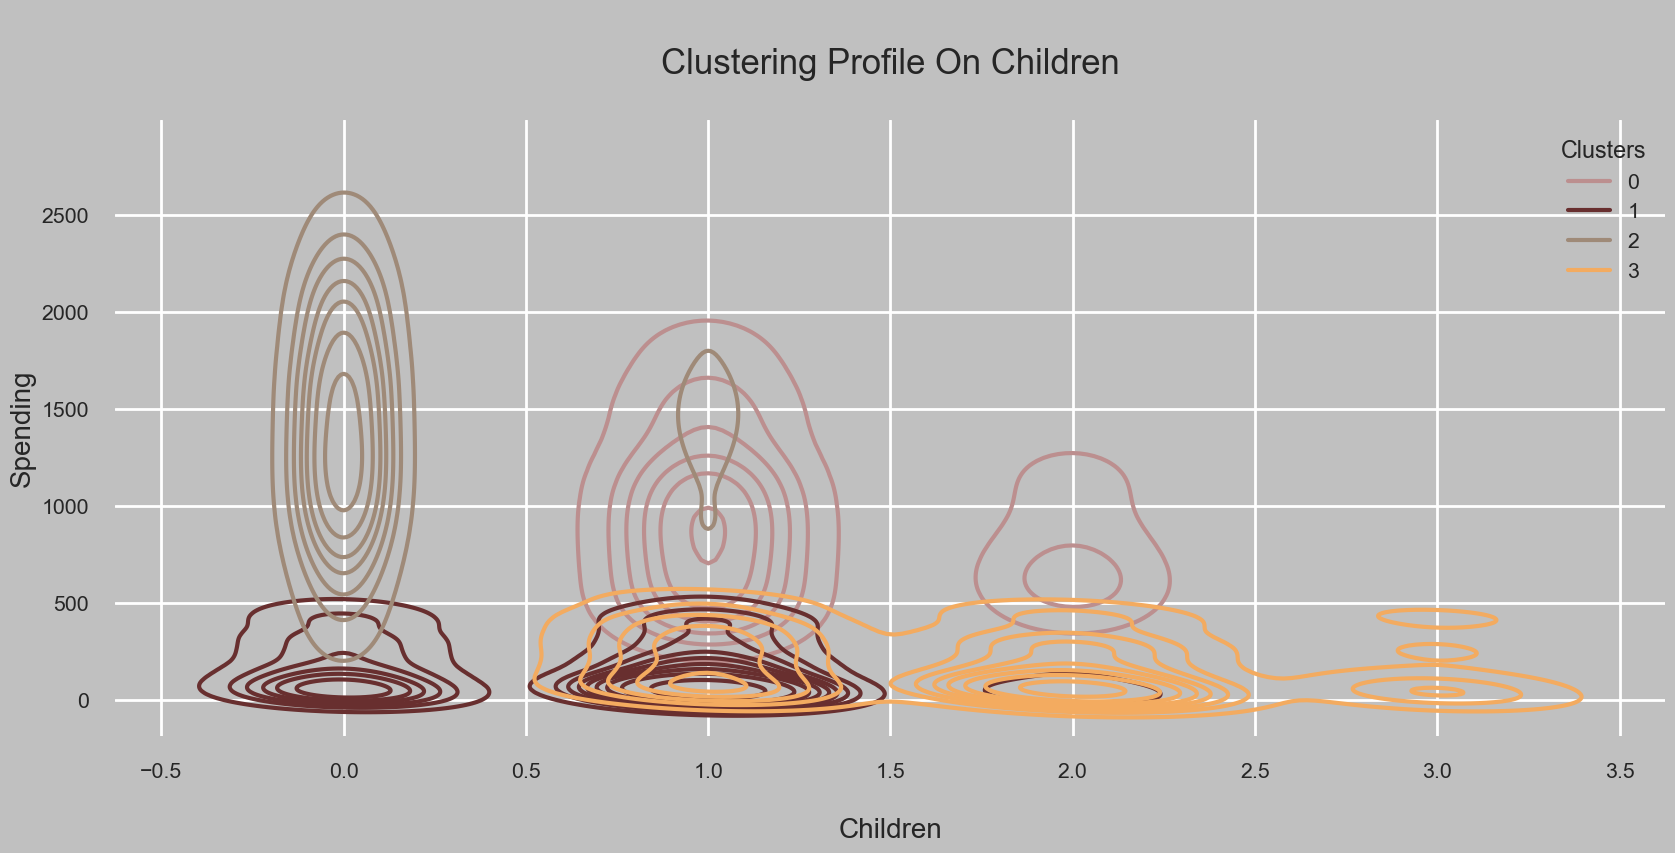

In [38]:
print(f"Characteristics of clusters based on spending and having childern :")
cluster("Children")

###                                                 **Insights:**

*   Most of the customers of cluster 0 don't have any child, only a few have one. Their spending range is in between 550 to 2000.
*   Customers of cluster 1 either have one child or don't have any. Their spending range is in between 0 to 500.
*  Most of the customers of cluster 2 have one child, some have two. Their spending range is in between 250 to 1800.
*  Most of the customers of cluster 3 have two child, some have one and very few have three. Their spending range is in between 0 to 500.


Characteristics of clusters based on spending and age :


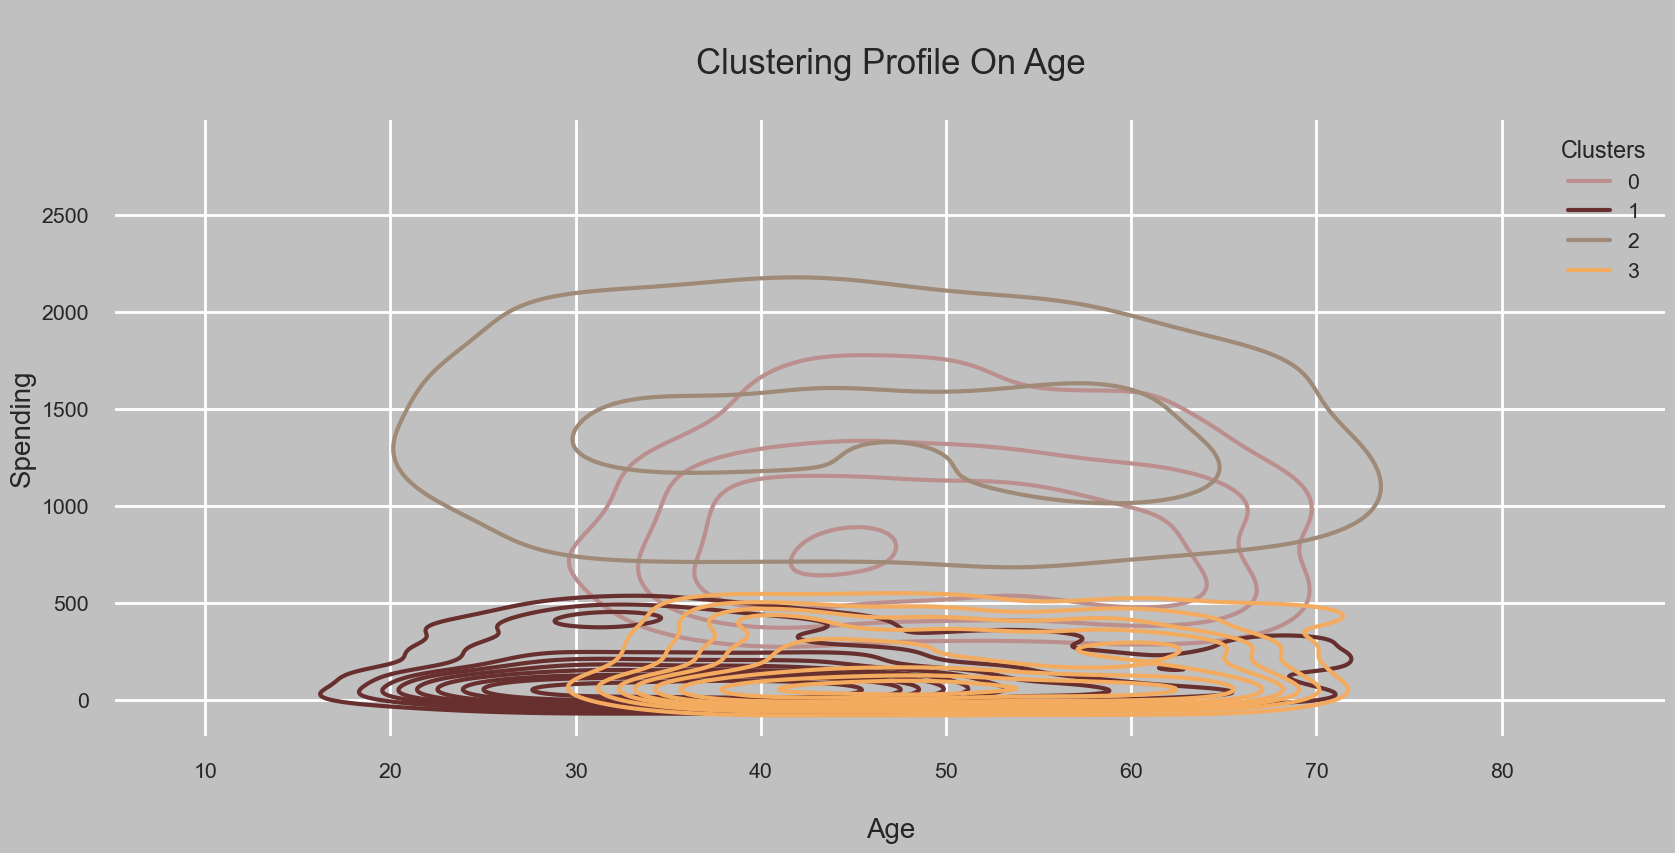

In [39]:
print(f"Characteristics of clusters based on spending and age :")
cluster("Age")

###                                              **Insights:**
*   Most of the customers of cluster 0 have age range in between 30 to 60. Their spending range is in between 550 to 2000.
*   Most of the customers of cluster 1 have age range in between 25 to 50. Their spending range is in between 0 to 500.
*  Most of the customers of cluster 2 have age range in between 35 to 60. Their spending range is in between 250 to 1800.
*  Most of the customers of cluster 3 have age range in between 40 to 65. Their spending range is in between 0 to 500.


Characteristics of clusters based on spending and education level :


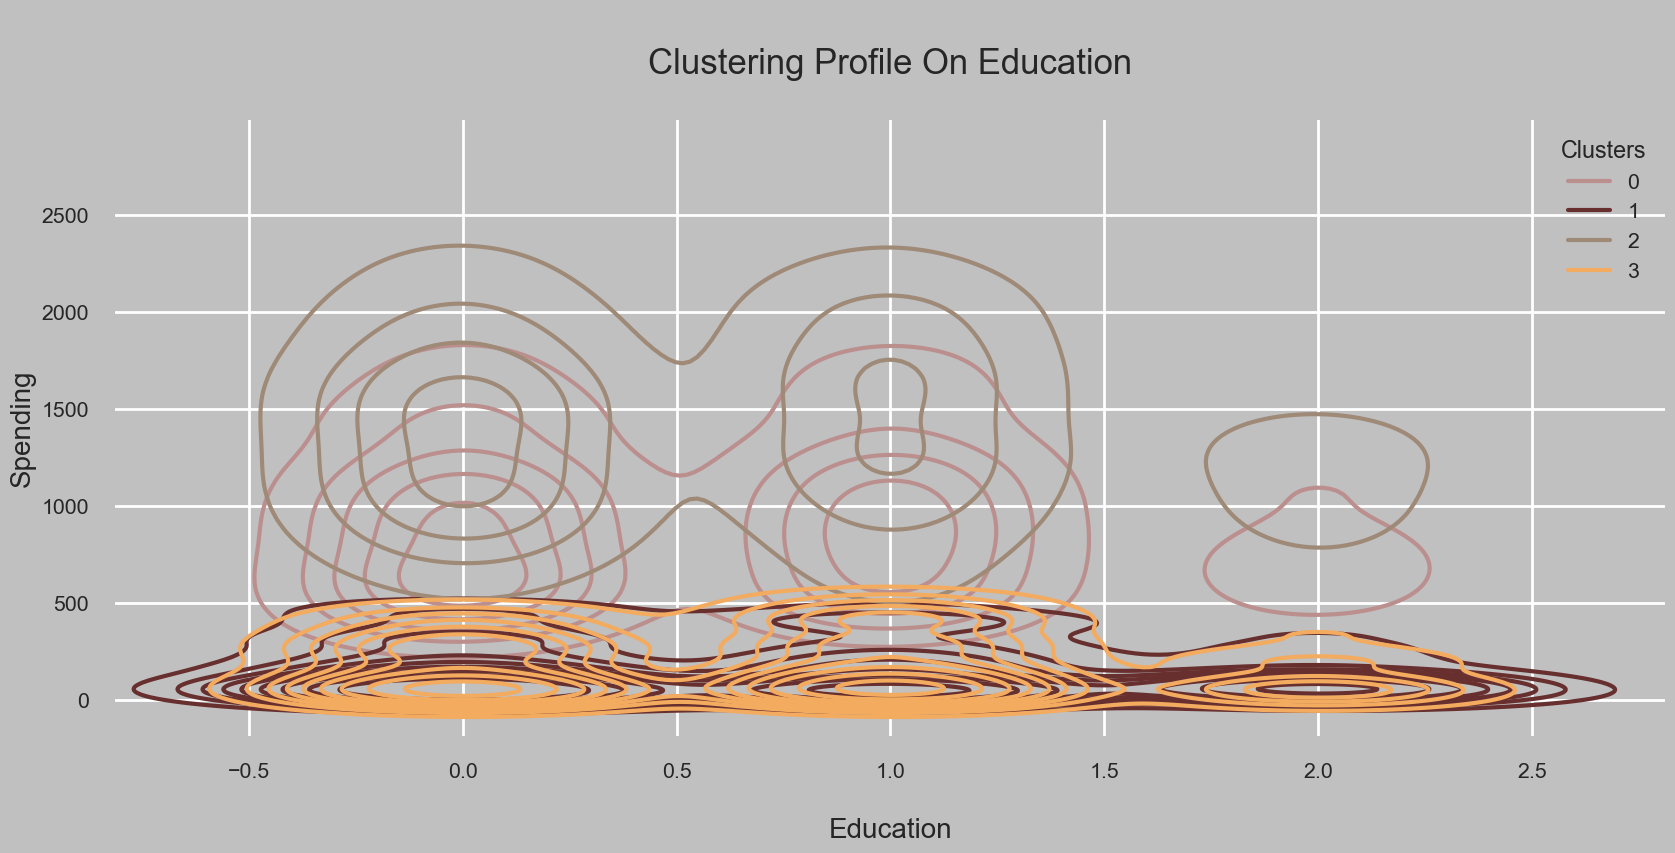

In [40]:
print(f"Characteristics of clusters based on spending and education level :")
cluster("Education")

###                                                 **Insights:**
*   Most of the customers of cluster 0 are graduate or in postgraduate level. Their spending range is in between 550 to 2000.
*   The customers of cluster 1 are graduate or in postgraduate level or in undergraduate level. Their spending range is in between 0 to 500.
*   Most of the customers of cluster 2 are graduate and in postgraduate level. Their spending range is in between 250 to 1800.
*   All the customers of cluster 3 are graduate or in postgraduate level and some are in undergraduate level. Their spending range is in between 0 to 500.


Characteristics of clusters based on spending and marital status :


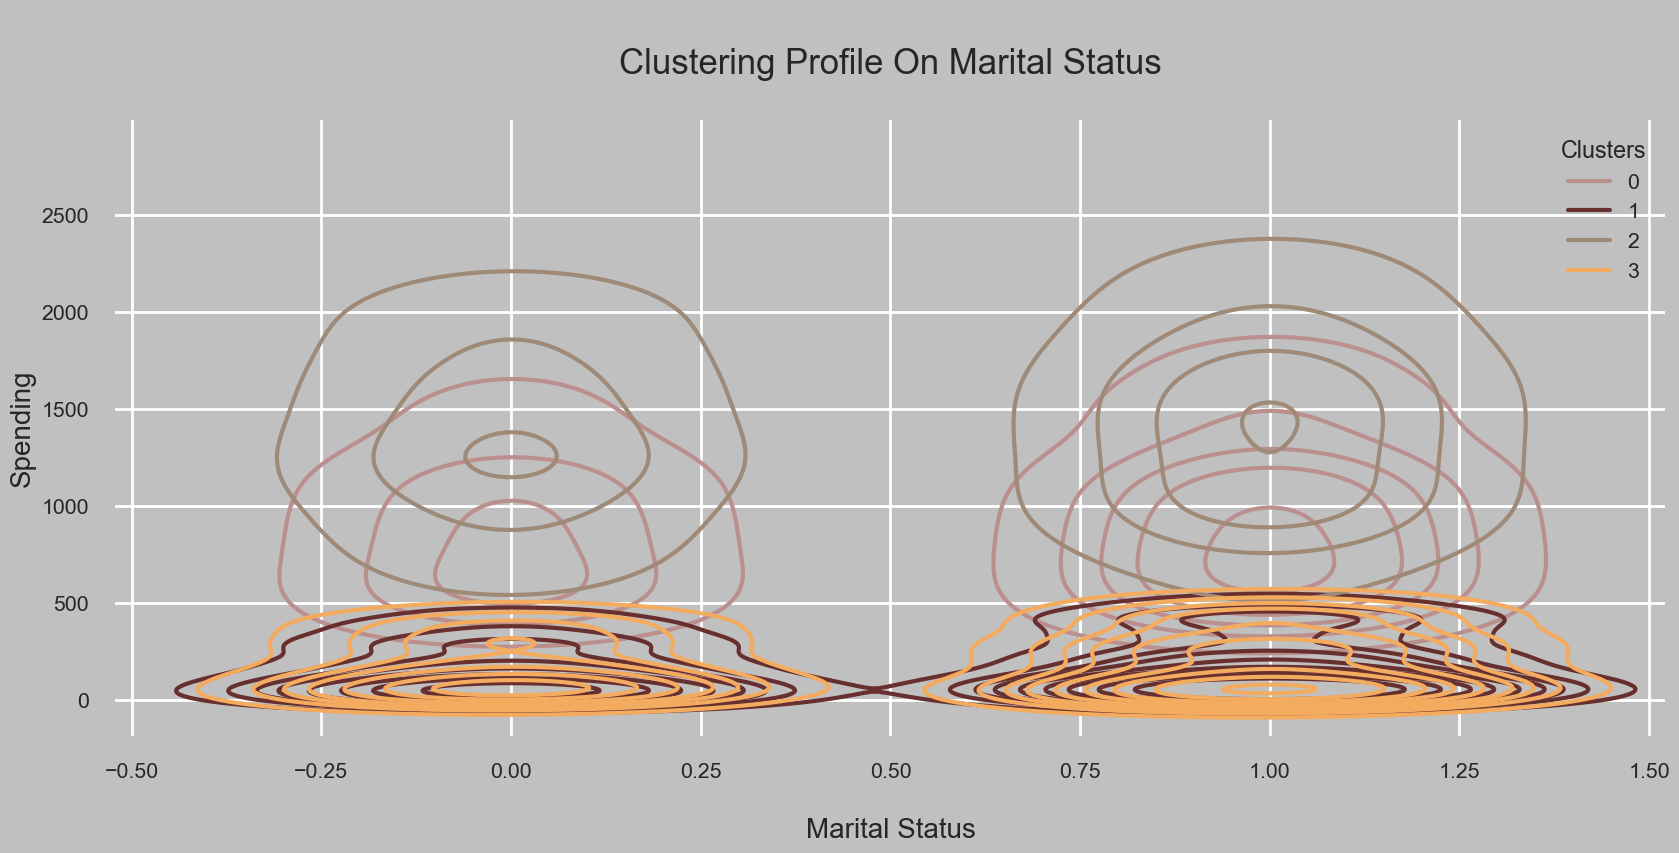

In [41]:
print(f"Characteristics of clusters based on spending and marital status :")
cluster("Marital Status")


###                                                **Insights:**
*   Most of the customers of cluster 0 are married. Their spending range is in between 550 to 2000.
*   Most of the customers of cluster 1 are married and few are unmarried. Their spending range is in between 0 to 500.
*  Most of the customers of cluster 2 are married. Their spending range is in between 250 to 1800.
*   Some customers of cluster 3 are married and some are unmarried. Their spending range is in between 0 to 500.


Characteristics of clusters based on spending and parental status :


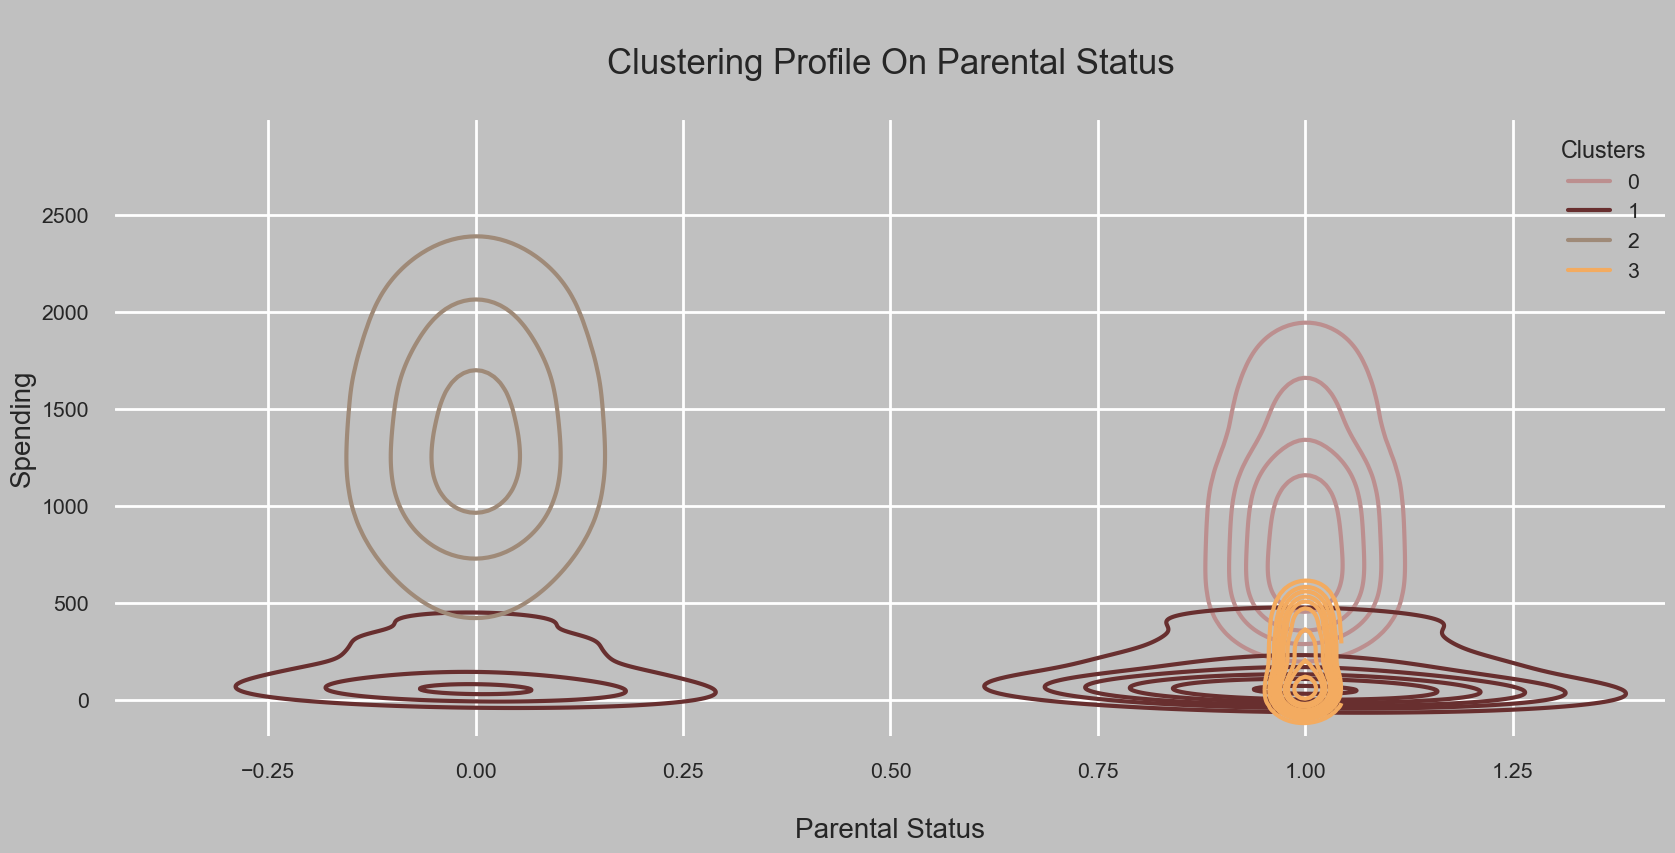

In [42]:
print(f"Characteristics of clusters based on spending and parental status :")
cluster("Parental Status")

###                                           **Insights:**
*   All the customers of cluster 0 are not parents. Their spending range is in between 550 to 2000.
*  Most of the customers of cluster 1 are parents and very few are not parents. Their spending range is in between 0 to 500.
*   All the customers of cluster 2 are parents. Their spending range is in between 250 to 1800.
*   All the customers of cluster 3 are parents. Their spending range is in between 0 to 500.


In [43]:
print(f"Characteristics of clusters based on spending and customer loyalty :")
cluster("customers_Loyalty")

Characteristics of clusters based on spending and customer loyalty :


###                                           **Insights:**
*   Most of the customers of cluster 0 are customer for 200 to 750 days. Their spending range is in between 550 to 2000.
*  Most of the customers of cluster 1 are  customer for 250 to 900 days. Their spending range is in between 0 to 500.
*   Most of the customers of cluster 2 are customer for 300 to 850 days. Their spending range is in between 250 to 1800.
*   Most of the customers of cluster 3 are customer for 100 to 700 days. Their spending range is in between 0 to 500.


#                                      **Customer's Cluster Profiling**

## 📌Cluster 0

👉 Income range is in between 65000 to 85000 and spending range is in between 550 to 2000  
👉 Age range in between 30 to 60  
👉 Almost all have completed graduation  
👉 Most of them are married  
👉 They are not parents  
👉 Have no child  
👉 Customer for at least 250 days  
👉 Promotion acceptance ratio is 0.5  
👉 Completing purchases using discounts are rare  


## 📌Cluster 1

👉 Income range is in between 5000 to 40000 and spending range is in between 0 to 500  
👉 Age range in between 25 to 50  
👉 From any educational level  
👉 Can be married and unmarried as well  
👉 Most of them are parents  
👉 Some have one child  
👉 Customer for at least 300 days  
👉 Promotion acceptance is rare  
👉 Very few complete purchases using discounts  

## 📌Cluster 2
👉 Income range is in between 50000 to 80000 and spending range is in between 250 to 1800  
👉 Age range in between 35 to 60  
👉 Almost all have completed graduation  
👉 Most of them are married  
👉 They are parents  
👉 All have children, most have one child  
👉 Customer for at least 400 days  
👉 Promotion acceptance ratio is poor  
👉 Highly interested in completing purchases using discounts  



## 📌Cluster 3
👉 Income range is in between 40000 to 60000 and spending range is in between 0 to 500  
👉 Age range in between 40 to 65  
👉 Almost all have completed graduation  
👉 Can be married and unmarried as well  
👉 They are parents  
👉 All have children, most have two children  
👉 Customer for at least 150 days  
👉 Promotion acceptance is rare  
👉 Highly interested in completing purchases using discounts  